In [1]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import pycountry

pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("Dataset/Series9700.csv")

In [4]:
df.sample()

,Unnamed: 0,Title,Synopsis,Tagline,Genero,Rating,Popularity,Vote Count,Vote Average,Original Language,Origin Country,First Air Date,Last Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Production Companies,Where to Watch,Reviews,Budget,Revenue,Cast,Creators,Poster,Trailer
8394,8394,The Traitors,"America’s most cunning contestants, a mix of f...",May the best scheme win.,Reality,7.2,50.97,30,7.2,en,US,2023-01-12,NaN,True,Returning Series,3,34,60.0,Studio Lambert,"Universal+ Amazon Channel, Sky Go, Paramount P...",No reviews,No data available,No data available,Alan Cumming,NaN,https://image.tmdb.org/t/p/w500/9Yhs5qPYa1cbWs...,https://www.youtube.com/watch?v=P3rqVPKOKfQ


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9695 entries, 0 to 9694
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            9695 non-null   int64  
 1   Title                 9695 non-null   object 
 2   Synopsis              8073 non-null   object 
 3   Tagline               1448 non-null   object 
 4   Genero                9161 non-null   object 
 5   Rating                9695 non-null   float64
 6   Popularity            9695 non-null   float64
 7   Vote Count            9695 non-null   int64  
 8   Vote Average          9695 non-null   float64
 9   Original Language     9695 non-null   object 
 10  Origin Country        9695 non-null   object 
 11  First Air Date        9662 non-null   object 
 12  Last Air Date         0 non-null      float64
 13  In production         9695 non-null   bool   
 14  Status                9695 non-null   object 
 15  Number of Season     

In [6]:
df.drop(columns = ["Tagline", "Vote Average","Last Air Date", "Production Companies","Revenue", "Budget","Poster", "Trailer" ], inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9695 entries, 0 to 9694
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          9695 non-null   int64  
 1   Title               9695 non-null   object 
 2   Synopsis            8073 non-null   object 
 3   Genero              9161 non-null   object 
 4   Rating              9695 non-null   float64
 5   Popularity          9695 non-null   float64
 6   Vote Count          9695 non-null   int64  
 7   Original Language   9695 non-null   object 
 8   Origin Country      9695 non-null   object 
 9   First Air Date      9662 non-null   object 
 10  In production       9695 non-null   bool   
 11  Status              9695 non-null   object 
 12  Number of Season    9695 non-null   int64  
 13  Number of Episodes  9695 non-null   int64  
 14  Episode Duration    9695 non-null   float64
 15  Where to Watch      9695 non-null   object 
 16  Review

In [8]:
df["release_year"]= df["First Air Date"].str.extract(r"(\d{4})")[0]
# de mi df creo una columna que solo es el año de release

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9695 entries, 0 to 9694
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          9695 non-null   int64  
 1   Title               9695 non-null   object 
 2   Synopsis            8073 non-null   object 
 3   Genero              9161 non-null   object 
 4   Rating              9695 non-null   float64
 5   Popularity          9695 non-null   float64
 6   Vote Count          9695 non-null   int64  
 7   Original Language   9695 non-null   object 
 8   Origin Country      9695 non-null   object 
 9   First Air Date      9662 non-null   object 
 10  In production       9695 non-null   bool   
 11  Status              9695 non-null   object 
 12  Number of Season    9695 non-null   int64  
 13  Number of Episodes  9695 non-null   int64  
 14  Episode Duration    9695 non-null   float64
 15  Where to Watch      9695 non-null   object 
 16  Review

In [10]:
# convierto la fecha a formato datetime
df["First Air Date"] = pd.to_datetime(df["First Air Date"], errors='coerce')

In [11]:
# miramos los nulos
def calculate_null_percentage(data):
    null_percentage = round(data.isna().sum() / len(data) * 100, 4)
    nulls_df = pd.DataFrame(null_percentage).reset_index()
    nulls_df.columns = ['header_name', 'percent_nulls']
    return nulls_df

In [12]:
calculate_null_percentage(df) # sinopsis, genero, first air date, cast y creadores

,header_name,percent_nulls
0,Unnamed: 0,0.0000
1,Title,0.0000
2,Synopsis,16.7303
3,Genero,5.5080
4,Rating,0.0000
5,Popularity,0.0000
6,Vote Count,0.0000
7,Original Language,0.0000
8,Origin Country,0.0000
9,First Air Date,0.3404


In [13]:
# elimino la columna creators
df.drop(columns = ["Creators","Unnamed: 0"], inplace=True)

In [14]:
calculate_null_percentage(df) # sinopsis, genero, first air date, cast

,header_name,percent_nulls
0,Title,0.0000
1,Synopsis,16.7303
2,Genero,5.5080
3,Rating,0.0000
4,Popularity,0.0000
5,Vote Count,0.0000
6,Original Language,0.0000
7,Origin Country,0.0000
8,First Air Date,0.3404
9,In production,0.0000


In [15]:
df["Synopsis"].isna().sum() # me interesa para el sentiment analysis

1622

In [16]:
df["Genero"].isna().sum() 

534

In [17]:
df[df["Genero"].isna()] # los nans de genero tienen los actores y alguna plataforma así que de momento no los elimino

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
9,Ich bin ein Star – Holt mich hier raus! Die St...,NaN,NaN,4.5,1888.810,2,de,DE,2018-01-20,True,Returning Series,7,111,65.0,RTL+,No reviews,"Angela Finger-Erben, Olivia Jones",2018
75,Pauw & Witteman,Pauw & Witteman is a Dutch late-night talk sho...,NaN,7.0,896.476,1,nl,NL,2006-09-04,False,Ended,8,642,50.0,NLZIET,No reviews,"Jeroen Pauw, Paul Witteman",2006
94,Xplay,Xplay (previously GameSpot TV and Extended Pla...,NaN,8.5,819.947,2,en,US,1998-07-04,True,Returning Series,9,632,30.0,No platforms available,No reviews,"Kristin Adams, Morgan Webb, Adam Sessler, Kate...",1998
146,TMZ Live,This hourlong show is an edited version of the...,NaN,2.0,689.913,1,en,US,2012-06-11,True,Returning Series,2,261,44.0,No platforms available,No reviews,"Harvey Levin, Charles Latibeaudiere",2012
153,Cutie Pie,NaN,NaN,4.0,679.843,1,ko,KR,2010-03-22,False,Ended,1,138,35.0,No platforms available,No reviews,"Chae Sang-woo, Ye Ji-won, Lee Young-yoo, Kim S...",2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9620,Holland Sport,NaN,NaN,0.0,45.161,0,en,NL,2003-10-19,False,Ended,9,231,50.0,NLZIET,No reviews,Matthijs van Nieuwkerk,2003
9623,Portia Faces Life,Portia Faces Life was heard on radio from 1940...,NaN,1.0,45.147,1,en,US,1954-04-05,False,Ended,2,324,15.0,No platforms available,No reviews,"Mark Miller, Frances Reid, Donald Woods, Karl ...",1954
9637,The Ten Assassinations,NaN,NaN,0.0,45.073,0,cn,HK,1976-08-30,False,Ended,1,50,0.0,No platforms available,No reviews,"Pat Poon, Tsui Siu-Ming, David Lau Chi-Wing, S...",1976
9661,さくら心中,NaN,NaN,0.0,44.985,0,ja,JP,2011-01-05,True,Returning Series,1,63,0.0,Hulu,No reviews,"Yûko Fueki, Hidenori Tokuyama, Kenji Matsuda, ...",2011


In [18]:
df["release_year"].isna().sum()

33

In [19]:
# elimino las series que no tienen release_year, son solo 33
df.dropna(subset= ["release_year"], inplace=True)

In [20]:
df.info() # me quedo con 9662 filas

<class 'pandas.core.frame.DataFrame'>
Index: 9662 entries, 0 to 9694
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Title               9662 non-null   object        
 1   Synopsis            8048 non-null   object        
 2   Genero              9136 non-null   object        
 3   Rating              9662 non-null   float64       
 4   Popularity          9662 non-null   float64       
 5   Vote Count          9662 non-null   int64         
 6   Original Language   9662 non-null   object        
 7   Origin Country      9662 non-null   object        
 8   First Air Date      9662 non-null   datetime64[ns]
 9   In production       9662 non-null   bool          
 10  Status              9662 non-null   object        
 11  Number of Season    9662 non-null   int64         
 12  Number of Episodes  9662 non-null   int64         
 13  Episode Duration    9662 non-null   float64       
 1

In [1076]:
# hay columnas que no tienen nulos pero muchos de sus valores son NO DATA AVAILABLE, NO REVIEWS, NO PLATFORMS ETC.
# todavía no elimino las columnas con demasiados nulos porque voy a usar sus valores 
# para compararlos con los valores de mi dataset de 9700 filas

### ORIGINAL LANGUAGE

In [21]:
df["Original Language"].value_counts(dropna=False)

Original Language
en    2836
ja    1925
zh    1050
ko     846
es     472
de     333
fr     253
pt     243
tl     193
cn     190
ru     189
hi     169
tr     134
nl     101
ar      95
el      89
he      59
it      51
th      50
pl      49
cs      40
sv      31
no      24
da      22
id      19
sk      18
af      17
hu      16
ur      14
bn      14
fi      14
ka      10
ro       9
sr       8
bg       8
ta       8
fa       7
ca       7
uk       7
hr       6
lt       6
te       3
kn       3
ms       3
kk       3
et       2
ab       2
mr       2
or       1
ga       1
sh       1
eu       1
cy       1
gl       1
mo       1
sl       1
mk       1
ml       1
as       1
lv       1
Name: count, dtype: int64

In [22]:
vals=pd.DataFrame(df["Original Language"].value_counts())

In [23]:
vals.head(10)
vals.reset_index(inplace=True)
vals.head()

,Original Language,count
0,en,2836
1,ja,1925
2,zh,1050
3,ko,846
4,es,472


In [24]:
# de 10 series para abajo lo agrupo en "otros" idiomas
group_languages_df=vals[vals["count"]<10]
group_languages=list(group_languages_df["Original Language"])

In [25]:
def clean_country(x):
    if x in group_languages:
        return "Other"
    else: 
        return x 

In [26]:
df["Original Language"]=list(map(clean_country, df["Original Language"]))

In [27]:
df["Original Language"].nunique()

33

In [28]:
df["Original Language"].value_counts(dropna=False)

Original Language
en       2836
ja       1925
zh       1050
ko        846
es        472
de        333
fr        253
pt        243
tl        193
cn        190
ru        189
hi        169
tr        134
nl        101
Other      96
ar         95
el         89
he         59
it         51
th         50
pl         49
cs         40
sv         31
no         24
da         22
id         19
sk         18
af         17
hu         16
fi         14
bn         14
ur         14
ka         10
Name: count, dtype: int64

In [29]:
def get_language(codigo):
    try:
        language = pycountry.languages.get(alpha_2= codigo)
        return language.name if language else codigo
    except KeyError:
        return codigo

In [30]:
df["Original Language"] = df["Original Language"].apply(get_language)

In [31]:
df["Original Language"].value_counts()

Original Language
English                 2836
Japanese                1925
Chinese                 1050
Korean                   846
Spanish                  472
German                   333
French                   253
Portuguese               243
Tagalog                  193
cn                       190
Russian                  189
Hindi                    169
Turkish                  134
Dutch                    101
Other                     96
Arabic                    95
Modern Greek (1453-)      89
Hebrew                    59
Italian                   51
Thai                      50
Polish                    49
Czech                     40
Swedish                   31
Norwegian                 24
Danish                    22
Indonesian                19
Slovak                    18
Afrikaans                 17
Hungarian                 16
Finnish                   14
Bengali                   14
Urdu                      14
Georgian                  10
Name: count, dtype: int64

In [32]:
# quiero averiguar que es el codigo cn
df[df["Original Language"]== "cn"] # cn son todas series de Hong Kong

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
36,HK 80's,This sitcom series premiered in 1981 and chan...,"Comedy, Drama, Family",0.000,1159.635,0,cn,HK,1981-06-08,False,Ended,6,1310,0.0,No platforms available,No reviews,"Wong San, Leung Bo-Ching, Leung Chung-Fun, Joh...",1981
56,A Kindred Spirit,A Kindred Spirit was a television drama series...,"Drama, Comedy",0.000,1015.575,0,cn,HK,1995-05-15,False,Ended,1,1128,40.0,No platforms available,No reviews,"Louise Lee Si-Kei, Lau Dan, Ram Chiang Chi-Kwo...",1995
88,Come Home Love: Lo and Behold,"Hung Sue Gan starting from the bottom, establi...","Family, Comedy, Drama",5.357,842.687,42,cn,HK,2017-02-06,True,Returning Series,1,2460,22.0,No platforms available,No reviews,"Lau Dan, Angela Tong Ying-Ying, Koni Lui, Pal ...",2017
133,Come Home Love,"MA FU, a retired employee of the HK Correction...","Comedy, Drama, Family",8.000,716.799,1,cn,HK,2012-05-14,False,Ended,2,995,0.0,No platforms available,No reviews,"Quinn Ho, Louis Cheung, Priscilla Wong, Owen C...",2012
201,Mind Our Own Business,"The frugal and harsh father, CHENG SAM, and th...","Family, Soap",0.000,596.746,0,cn,HK,1993-05-10,False,Ended,1,319,0.0,No platforms available,No reviews,"Michelle Yim, Waise Lee Chi-Hung, Esther Kwan ...",1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9569,"Mythical Crane, Magic Needle '92",NaN,"Action & Adventure, Drama",6.000,45.312,1,cn,HK,1992-11-16,False,Ended,1,30,0.0,No platforms available,No reviews,"Michelle Yim, Kingdom Yuen King-Tan, Eric Wan ...",1992
9593,Blowing in the Wind,Brothers Bo and Wei are forced to join the tri...,Drama,0.000,45.230,0,cn,HK,1980-05-12,False,Ended,1,80,0.0,No platforms available,No reviews,"Chen Kuan-Tai, Kong Hon, Violet Lee Ying, Iris...",1980
9611,The Ghetto-Fabulous Lady,A woman who went from rags to riches after mar...,"Crime, Mystery",0.000,45.186,0,cn,HK,2019-02-25,False,Ended,1,25,43.0,No platforms available,No reviews,"Nadia Chan Chung-Ling, Alice Chan Wai, Tsui Wi...",2019
9630,Conflict,"Conflict is a TVB television series, premiered...",Drama,0.000,45.116,0,cn,HK,1978-10-02,False,Ended,1,85,45.0,No platforms available,No reviews,"Chow Yun-Fat, Angie Chiu Nga-Chi, Shek Sau, Ka...",1978


In [33]:
df.loc[df["Original Language"]== "cn", "Original Language"]= "Cantonese"

In [34]:
df.loc[df["Original Language"]== "Modern Greek (1453-)", "Original Language"]= "Greek"

### ORIGIN COUNTRY

Hago lo mismo con el País de origen

In [35]:
df["Origin Country"].value_counts(dropna=False)

Origin Country
US                1972
JP                1918
CN                 943
KR                 828
GB                 463
                  ... 
FR, IN               1
BE, FR, US           1
GB, IE               1
US, VE, MX           1
US, BE, FR, CA       1
Name: count, Length: 225, dtype: int64

In [36]:
df["Origin Country"].isna().sum() 

0

In [37]:
df["Origin Country"] = df["Origin Country"].str.split(",").str[0] # separo los Países por comas y me quedo con el primero

In [38]:
df["Origin Country"].value_counts(dropna=False)

Origin Country
US    2017
JP    1931
CN     959
KR     834
GB     484
      ... 
DO       1
KP       1
XC       1
LV       1
CM       1
Name: count, Length: 85, dtype: int64

In [39]:
df[df["Origin Country"]== "No data available"]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
185,Hometown Over the Hill,By depicting the dreams of people living in fa...,"Drama, Family, Sci-Fi & Fantasy",0.0,618.715,0,Korean,No data available,2007-10-24,False,Ended,2,336,60.0,No platforms available,No reviews,"Woo Hee-jin, Kim Chang-sook, Seo Tae-hwa, Lee ...",2007
378,Common Knowledge,Game show about common knowledge hosted by Joe...,NaN,7.0,402.982,1,English,No data available,2019-01-14,False,Ended,3,261,22.0,No platforms available,No reviews,Joey Fatone,2019
484,Asa ga Kita,"Towards the end of the Edo era, in the town of...",Drama,8.0,356.471,2,Japanese,No data available,2015-09-28,False,Ended,1,156,15.0,No platforms available,No reviews,"Haru, Hiroshi Tamaki, Aoi Miyazaki, Dean Fujio...",2015
512,Himawari,NaN,Drama,8.0,345.059,1,Japanese,No data available,1996-04-01,False,Ended,1,162,15.0,No platforms available,No reviews,"Nanako Matsushima, Mari Natsuki, Shiho Fujimur...",1996
513,Die Montagsmaler,NaN,Reality,0.0,343.932,0,German,No data available,1974-01-14,False,Canceled,6,285,0.0,No platforms available,No reviews,Guido Cantz,1974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9306,Ταύρος με Τοξότη,NaN,Comedy,7.0,46.366,1,Greek,No data available,1994-09-16,False,Ended,1,32,0.0,No platforms available,No reviews,"Giannis Vouros, Peggy Stathakopoulou, Dimitris...",1994
9317,A Walk To Happiness,NaN,NaN,0.0,46.334,0,Chinese,No data available,2013-09-04,False,Ended,1,31,45.0,No platforms available,No reviews,"Zhao Huinan, Yao Qianyu, Li Jiaxuan, Jiang Cha...",2013
9557,푸른거탑 - 롤러코스터2,NaN,Comedy,0.0,45.381,0,Korean,No data available,2012-04-29,False,Ended,1,27,0.0,No platforms available,No reviews,"Choi Jong-hoon, Kim Jae-woo, Kim Ho-chang, Bae...",2012
9564,Show Offs,The Show Offs are a troupe of long-form improv...,NaN,4.0,45.342,2,English,No data available,2019-03-18,True,Returning Series,3,33,0.0,No platforms available,No reviews,"Casey Jost, Lisa Valentine Clark",2019


In [40]:
def asignar_pais_por_idioma(fila):
    idioma_pais = {"English": "US",
        "Korean": "KR",
        "Japanese": "JP",
        "Spanish": "ES",
        "French": "FR",
        "German": "DE",
        "Chinese": "CN",
        "Greek": "GR",
        "Russian": "RU",
        "Slovak":"SK",
        "Hungarian":"HU",
        "Turkish":"TR",
        "Thai":"TH",
        "Portuguese":"BR"}
    # Si el país es "no data available" asignamos el país según el idioma
    if fila["Origin Country"] == "No data available":
        return idioma_pais.get(fila["Original Language"])
    else:
        return fila["Origin Country"]  # Si ya tiene un país, lo mantiene

In [41]:
df["Origin Country"] = df.apply(asignar_pais_por_idioma, axis=1)


In [1098]:
pd.set_option("display.max_rows", None)

In [42]:
df["Origin Country"].value_counts(dropna=False)

Origin Country
US    2038
JP    1935
CN     966
KR     848
GB     484
      ... 
TN       1
MK       1
KP       1
XG       1
CM       1
Name: count, Length: 85, dtype: int64

In [43]:
df.dropna(subset="Origin Country", inplace =True)

In [44]:
df["Origin Country"].nunique() # me interesan los paises por si quiero hacer visualización en un mapa

84

In [45]:
def country_name(sigla):
    try:
        country = pycountry.countries.get(alpha_2 = sigla)
        return country.name if country else sigla
    except KeyError:
        return sigla

In [46]:
df["Origin Country"] = df["Origin Country"].apply(country_name)

In [47]:
df["Origin Country"].value_counts()

Origin Country
United States                             2038
Japan                                     1935
China                                      966
Korea, Republic of                         848
United Kingdom                             484
                                          ... 
Tunisia                                      1
North Macedonia                              1
Korea, Democratic People's Republic of       1
XG                                           1
Cameroon                                     1
Name: count, Length: 84, dtype: int64

In [48]:
# elimino también los paises YU, XC y XG
df = df[df["Origin Country"].isin(["SU", "YU", "XC", "XG"])== False]

In [49]:
df["Origin Country"].value_counts()

Origin Country
United States                             2038
Japan                                     1935
China                                      966
Korea, Republic of                         848
United Kingdom                             484
                                          ... 
Bosnia and Herzegovina                       1
Dominican Republic                           1
Korea, Democratic People's Republic of       1
Latvia                                       1
Cameroon                                     1
Name: count, Length: 80, dtype: int64

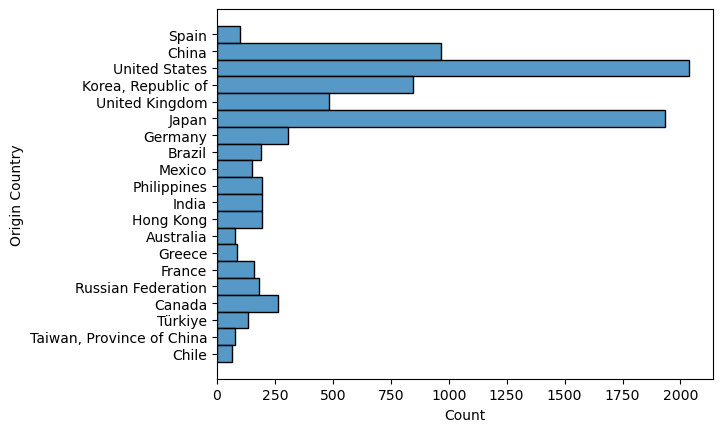

In [50]:
top_20_paises = df["Origin Country"].value_counts().head(20).index
df_top_20 = df[df["Origin Country"].isin(top_20_paises)]
sns.histplot(data=df_top_20, y="Origin Country", discrete=True)
plt.show()

In [52]:
num = ["Rating", "Popularity", "Vote Count", "Number of Season", "Number of Episodes", "Episode Duration", "release_year"]

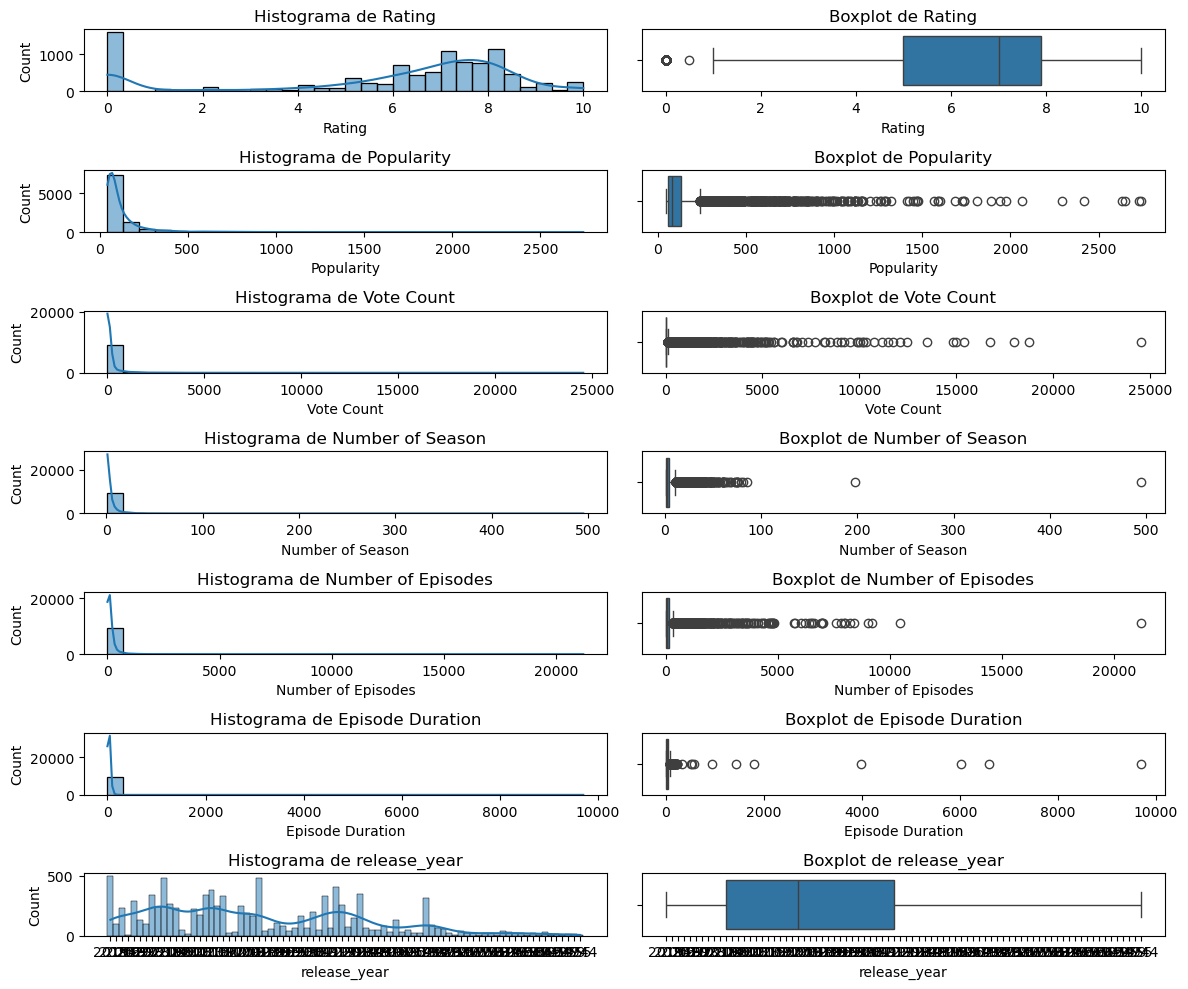

In [53]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(num, 1):
    plt.subplot(len(num), 2, i*2-1)
    sns.histplot(df[column], bins = 30, kde = True)
    plt.title(f"Histograma de {column}")

    plt.subplot(len(num), 2, i*2)
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot de {column}")

plt.tight_layout()
plt.show()

In [54]:
df.describe() # rating, vote count y episode duration tienen 0 

,Rating,Popularity,Vote Count,First Air Date,Number of Season,Number of Episodes,Episode Duration
count,9642.000000,9642.000000,9642.000000,9642,9642.000000,9642.000000,9642.000000
mean,5.822463,127.120060,187.122278,2007-05-26 23:58:48.313627904,4.449077,179.197262,35.010128
min,0.000000,44.858000,0.000000,1944-01-20 00:00:00,1.000000,1.000000,0.000000
25%,5.000000,57.617750,1.000000,2001-04-03 06:00:00,1.000000,36.000000,14.000000
50%,7.000000,79.518000,6.000000,2011-10-02 12:00:00,2.000000,68.000000,28.000000
75%,7.900000,131.006750,49.000000,2018-02-22 12:00:00,5.000000,153.000000,45.000000
max,10.000000,2742.445000,24560.000000,2025-02-08 00:00:00,495.000000,21205.000000,9700.000000
std,2.972342,159.052467,846.646974,NaN,8.809356,530.728116,144.535562


In [1111]:
pd.set_option("display.max_rows", 20)

### RATING

In [55]:
df[(df["Rating"] == 0) & (df["Vote Count"]== 0)] # hay 1587 valores de rating igual a 0 

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
23,Secret Story - Desafio Final,"Spin-off show from the reality show ""Secret St...",Reality,0.0,1445.169,0,Portuguese,Portugal,2013-01-06,True,Returning Series,7,139,82.5,No platforms available,No reviews,NaN,2013
31,Choti Sarrdaarni,"Kulwant Kaur, a Punjab-based widow, goes again...",Drama,0.0,1260.839,0,Hindi,India,2019-07-01,False,Ended,1,810,24.0,No platforms available,No reviews,"Nimrit Ahluwalia, Avinesh Rekhi, Shivendraa Om...",2019
36,HK 80's,This sitcom series premiered in 1981 and chan...,"Comedy, Drama, Family",0.0,1159.635,0,Cantonese,Hong Kong,1981-06-08,False,Ended,6,1310,0.0,No platforms available,No reviews,"Wong San, Leung Bo-Ching, Leung Chung-Fun, Joh...",1981
44,Comedy Big League,NaN,Comedy,0.0,1118.085,0,Korean,"Korea, Republic of",2011-09-17,True,Returning Series,4,547,77.5,No platforms available,No reviews,"Lee Gook-ju, Hwang Je-sung, Lee Sang-jun, Shin...",2011
56,A Kindred Spirit,A Kindred Spirit was a television drama series...,"Drama, Comedy",0.0,1015.575,0,Cantonese,Hong Kong,1995-05-15,False,Ended,1,1128,40.0,No platforms available,No reviews,"Louise Lee Si-Kei, Lau Dan, Ram Chiang Chi-Kwo...",1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9661,さくら心中,NaN,NaN,0.0,44.985,0,Japanese,Japan,2011-01-05,True,Returning Series,1,63,0.0,Hulu,No reviews,"Yûko Fueki, Hidenori Tokuyama, Kenji Matsuda, ...",2011
9667,チロリン村物语,NaN,"Animation, Drama",0.0,44.939,0,Japanese,Japan,1992-04-06,False,Ended,1,57,25.0,No platforms available,No reviews,"Noriko Hidaka, Minami Takayama",1992
9672,Dear You,"Alma, a young Parisian, juggles between her pr...","Comedy, Soap",0.0,44.928,0,French,France,2025-02-07,True,Returning Series,1,15,26.0,Amazon Prime Video,No reviews,"Carla Poquin, Louka Meliava, Terence Telle",2025
9673,Trouble Chocolate,Trouble Chocolate is a comedy anime produced b...,Animation,0.0,44.927,0,Japanese,Japan,1999-10-09,False,Ended,1,20,25.0,No platforms available,No reviews,"Naoki Yanagi, Sakura Tange, Tomohiro Tsuboi, Y...",1999


In [56]:
df[(df["Rating"] == 0) & (df["Vote Count"]== 0)].groupby("Origin Country").size().reset_index(name="Num Series").sort_values(by=["Num Series"], ascending=False)

,Origin Country,Num Series
28,Japan,248
9,China,219
31,"Korea, Republic of",134
42,Philippines,133
60,United States,95
...,...,...
30,"Korea, Democratic People's Republic of",1
47,Serbia,1
32,Latvia,1
24,"Iran, Islamic Republic of",1


In [57]:
df[(df["Rating"] == 0)].groupby("Origin Country").size().reset_index(name="Num Series").sort_values(by=["Num Series"], ascending=False)

,Origin Country,Num Series
28,Japan,250
9,China,220
31,"Korea, Republic of",135
42,Philippines,133
60,United States,95
...,...,...
30,"Korea, Democratic People's Republic of",1
47,Serbia,1
32,Latvia,1
24,"Iran, Islamic Republic of",1


Decido convertir los 0 de ratings en nulos para quedarme con los valores más reales

In [58]:
df["Rating"] = df["Rating"].replace(0, np.nan)

Text(0.5, 1.0, 'Histograma de Rating')

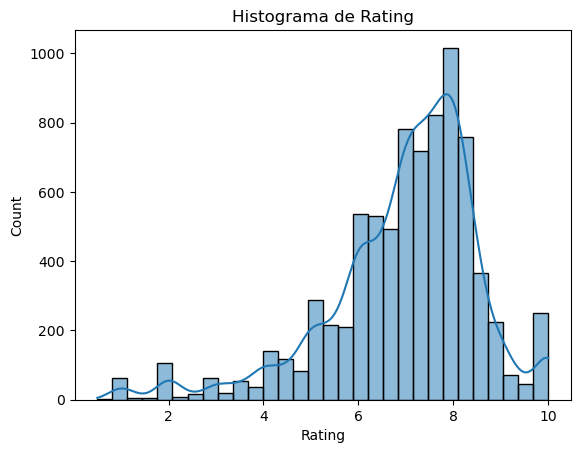

In [59]:
sns.histplot(df["Rating"], bins = 30, kde = True)
plt.title(f"Histograma de Rating")

<Axes: xlabel='Rating'>

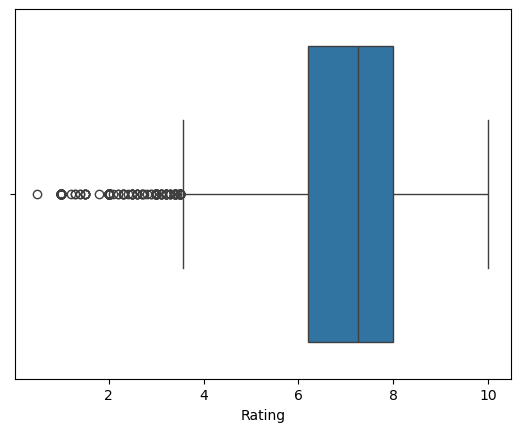

In [60]:
sns.boxplot(data = df, x = "Rating")

In [61]:
len(df[df["Rating"]<4])

379

In [62]:
df[df["Rating"]>9].groupby("Origin Country").size().reset_index(name="Num Series").sort_values(by=["Num Series"], ascending=False)

,Origin Country,Num Series
22,Japan,77
7,China,76
24,"Korea, Republic of",31
44,United States,24
33,Russian Federation,22
16,Hong Kong,17
18,India,13
6,Canada,10
30,Philippines,9
29,Pakistan,9


In [63]:
df[df["Rating"]<4].groupby("Origin Country").size().reset_index(name="Num Series").sort_values(by=["Num Series"], ascending=False)

,Origin Country,Num Series
22,"Korea, Republic of",55
40,United States,42
7,Chile,38
14,Germany,33
21,Japan,22
6,Canada,22
23,Mexico,21
39,United Kingdom,18
17,India,18
8,China,14


In [64]:
df[df["Rating"]==10] # hay 232 series con un rating de 10, pero solo cuentan con 1 voto o 2 

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
250,Pyaar Kii Ye Ek Kahaani,This supernatural series narrates the story of...,"Mystery, Drama, Soap",10.0,535.372,1,Hindi,India,2010-10-18,False,Ended,10,331,23.5,No platforms available,No reviews,"Vivian Dsena, Sukirti Kandpal, Priya Wal, Kish...",2010
261,Incognito,"In search of redemption, a crew of misfits joi...","Action & Adventure, Drama",10.0,317.995,1,Tagalog,Philippines,2025-01-20,True,Returning Series,1,50,0.0,Netflix,No reviews,"Daniel Padilla, Richard Gutierrez, Ian Venerac...",2025
264,Chinna Thambi,"Two people, who are poles apart, find love in ...","Drama, Comedy",10.0,466.033,1,Other,India,2017-10-02,True,Returning Series,1,320,30.0,No platforms available,No reviews,"Prajin Padmanabhan, Pavani Reddy, Hema Rajkuma...",2017
330,3000 Whys of Blue Cat,3000 Whys of Blue Cat is the first large-scale...,"Kids, Animation",10.0,307.868,1,Chinese,China,1999-10-09,False,Ended,7,2161,10.0,No platforms available,No reviews,NaN,1999
520,No Way I'm an Adult,NaN,Documentary,10.0,340.914,1,Korean,"Korea, Republic of",2015-09-10,True,Returning Series,3,209,60.0,No platforms available,No reviews,"Kim Sang-joong, Ha Seok-jin",2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,我们都爱笑,NaN,Reality,10.0,45.366,1,Chinese,China,2014-02-15,False,Ended,2,91,0.0,No platforms available,No reviews,"Helong Wang, Xu Xiao, Zheng Gu, Lin Siyi, Xixi...",2014
9578,Hi-Jinks,Hi-Jinks is a hidden camera show that premiere...,Comedy,10.0,45.279,1,English,United States,2005-08-02,False,Ended,3,18,30.0,No platforms available,No reviews,Leila Sbitani,2005
9598,Charging Topspinner,In a modern society where top spinners are pop...,"Animation, Kids, Action & Adventure, Comedy, S...",10.0,45.212,1,Korean,"Korea, Republic of",2023-06-05,True,Returning Series,3,52,20.0,Watcha,No reviews,"Park Shi-yoon, Kim Myung-jun",2023
9629,Kuch Rang Pyar Ke Aise Bhi,Kuch Rang Pyar Ke Aise Bhi (Some Colors Of Lov...,"Drama, Soap, Family",10.0,45.118,2,Hindi,India,2016-02-29,False,Ended,3,67,0.0,Sony Liv,No reviews,"Erica Fernandes, Shaheer Sheikh, Supriya Pilga...",2016


In [65]:
df[df["Rating"]==10].groupby("Origin Country").size().reset_index(name="Num Series").sort_values(by=["Num Series"], ascending=False)

,Origin Country,Num Series
19,Japan,43
7,China,41
20,"Korea, Republic of",21
35,United States,17
15,Hong Kong,15
28,Russian Federation,12
16,India,11
6,Canada,8
25,Pakistan,8
18,Israel,5


In [66]:
df.groupby("Origin Country")["Rating"].mean()

Origin Country
Argentina                             6.044814
Australia                             6.368775
Austria                               6.343687
Bangladesh                           10.000000
Belgium                               6.273026
                                       ...    
Ukraine                               7.175091
United Arab Emirates                  6.050000
United Kingdom                        6.558021
United States                         7.090616
Venezuela, Bolivarian Republic of     5.188889
Name: Rating, Length: 80, dtype: float64

In [67]:
df.groupby("Origin Country").agg(num_series = ("Rating", "size"), avg_rating = ("Rating", "mean")).sort_values(by="num_series", ascending=False)

,num_series,avg_rating
Origin Country,,
United States,2038,7.090616
Japan,1935,7.396561
China,966,7.432965
"Korea, Republic of",848,6.685112
United Kingdom,484,6.558021
...,...,...
Bosnia and Herzegovina,1,7.200000
Latvia,1,NaN
"Korea, Democratic People's Republic of",1,NaN


### POPULARITY

In [68]:
# convierto popularity de float a int
df["Popularity"] = df["Popularity"].astype(int)

Text(0.5, 1.0, 'Boxplot')

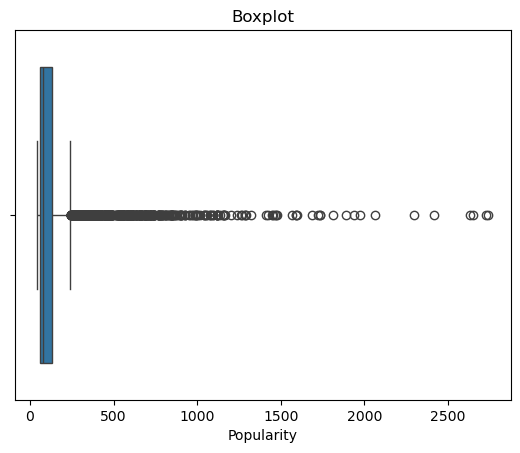

In [69]:
sns.boxplot(data = df, x="Popularity")
plt.title(f"Boxplot")

Text(0.5, 1.0, 'Histograma')

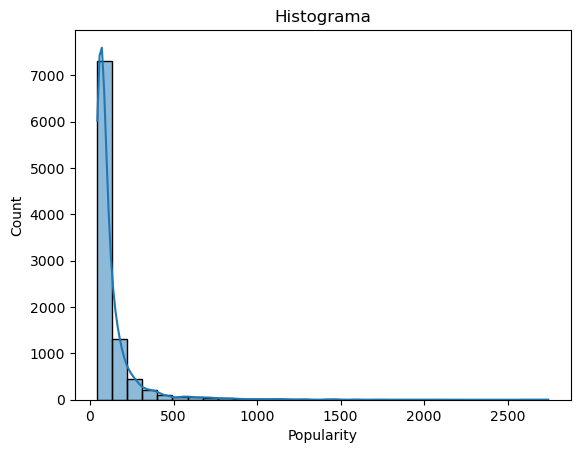

In [70]:
sns.histplot(data = df, x= "Popularity", bins = 30, kde = True)
plt.title(f"Histograma")

In [71]:
# Checking how many values will be removed if the outliers are removed
iqr = np.percentile(df["Popularity"],75) - np.percentile(df["Popularity"],25)
upper_limit = np.percentile(df["Popularity"],75) + 1.5*iqr
print(upper_limit)

242.0


In [72]:
removed = df[df["Popularity"] > upper_limit]
len(removed)  # This checks the number of outliers that will be removed, too many

902

In [73]:
df.describe()

,Rating,Popularity,Vote Count,First Air Date,Number of Season,Number of Episodes,Episode Duration
count,8047.000000,9642.000000,9642.000000,9642,9642.000000,9642.000000,9642.000000
mean,6.976536,126.617196,187.122278,2007-05-26 23:58:48.313627904,4.449077,179.197262,35.010128
min,0.500000,44.000000,0.000000,1944-01-20 00:00:00,1.000000,1.000000,0.000000
25%,6.200000,57.000000,1.000000,2001-04-03 06:00:00,1.000000,36.000000,14.000000
50%,7.264000,79.000000,6.000000,2011-10-02 12:00:00,2.000000,68.000000,28.000000
75%,8.000000,131.000000,49.000000,2018-02-22 12:00:00,5.000000,153.000000,45.000000
max,10.000000,2742.000000,24560.000000,2025-02-08 00:00:00,495.000000,21205.000000,9700.000000
std,1.591777,159.053956,846.646974,NaN,8.809356,530.728116,144.535562


In [74]:
df.loc[[df["Popularity"].idxmax()]]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
0,GH Dúo,NaN,Reality,7.3,2742,3,Spanish,Spain,2019-01-08,True,Returning Series,3,146,105.0,Tivify,No reviews,NaN,2019


In [76]:
df.loc[[df["Popularity"].idxmin()]] 

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
9653,Puppy Dog Pals,"Fun-loving pug puppies, brothers Bingo and Rol...","Animation, Kids, Family, Comedy, Drama",6.1,44,16,English,United States,2017-04-14,True,Returning Series,5,232,12.0,"Hotstar, Amazon Prime Video, fuboTV, DisneyNOW...",Puppy Pal Fan here since the premiere of seaso...,"Harland Williams, Jessica DiCicco, Elisha Will...",2017


In [77]:
df[df["Popularity"]>1000].groupby("Popularity")["Rating"].mean()

Popularity
1007    7.500
1015      NaN
1041    6.100
1044    4.600
1051    5.800
1058    6.200
1076    5.600
1079    1.500
1080    5.800
1092    8.200
1096    8.400
1117    3.800
1118    6.800
1119    4.200
1121    8.300
1127    5.078
1136    6.765
1152    6.200
1153    2.600
1159      NaN
1160    8.500
1166    6.000
1204    5.500
1240    6.000
1260      NaN
1266    5.624
1285    4.700
1288    4.368
1292    7.970
1323    5.400
1414    6.600
1424    7.500
1445      NaN
1456    6.000
1468    5.000
1472    7.900
1476    8.400
1567    5.300
1589    6.800
1591    8.100
1600    6.500
1686    4.200
1725    3.900
1734    6.150
1812    6.300
1888    4.500
1938    7.900
1976    5.800
2065    6.300
2295    2.600
2416    8.400
2634    5.500
2650    6.500
2731    8.900
2742    7.300
Name: Rating, dtype: float64

In [ ]:
# los valores de Popularity van del 44 hasta el 2742
# que sean más populares sin embargo no significa que tenga un rating más alto

In [78]:
df.groupby("Origin Country").agg(num_series = ("Popularity", "size"), avg_popularity = ("Popularity", "mean")).sort_values(by="num_series", ascending=False)

,num_series,avg_popularity
Origin Country,,
United States,2038,129.301276
Japan,1935,117.742636
China,966,91.226708
"Korea, Republic of",848,132.476415
United Kingdom,484,141.716942
...,...,...
Bosnia and Herzegovina,1,56.000000
Latvia,1,50.000000
"Korea, Democratic People's Republic of",1,310.000000


### VOTE COUNT

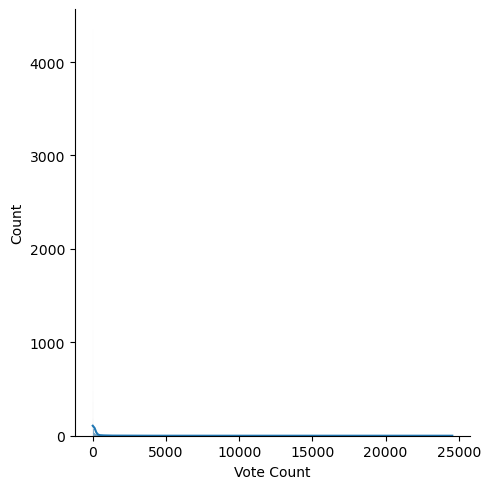

In [79]:
sns.displot(df["Vote Count"], kde = True)
plt.show()

Text(0.5, 1.0, 'Boxplot')

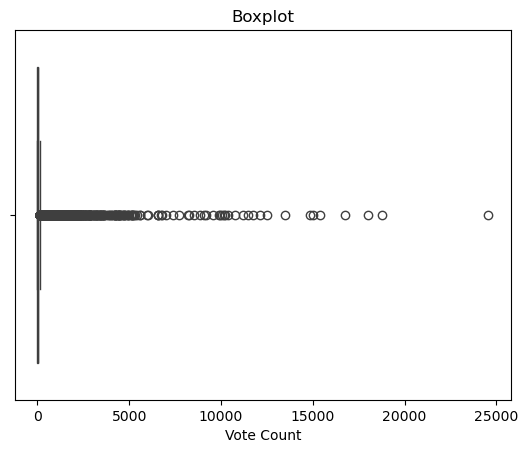

In [80]:
sns.boxplot(data = df, x="Vote Count")
plt.title(f"Boxplot")

In [81]:
df.loc[[df["Vote Count"].idxmax()]] # tiene sentido que el vote count para esta serie sea muy alto

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
108,Game of Thrones,Seven noble families fight for control of the ...,"Sci-Fi & Fantasy, Drama, Action & Adventure",8.5,774,24560,English,United States,2011-04-17,False,Ended,8,73,0.0,"Sky X, Spectrum On Demand, Strim, Neon TV, Mov...",I started watching when it came out as I heard...,"Peter Dinklage, Kit Harington, Nikolaj Coster-...",2011


In [82]:
df[df["Vote Count"]== 0] # el vote count =0 coincide con el rating null

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
23,Secret Story - Desafio Final,"Spin-off show from the reality show ""Secret St...",Reality,NaN,1445,0,Portuguese,Portugal,2013-01-06,True,Returning Series,7,139,82.5,No platforms available,No reviews,NaN,2013
31,Choti Sarrdaarni,"Kulwant Kaur, a Punjab-based widow, goes again...",Drama,NaN,1260,0,Hindi,India,2019-07-01,False,Ended,1,810,24.0,No platforms available,No reviews,"Nimrit Ahluwalia, Avinesh Rekhi, Shivendraa Om...",2019
36,HK 80's,This sitcom series premiered in 1981 and chan...,"Comedy, Drama, Family",NaN,1159,0,Cantonese,Hong Kong,1981-06-08,False,Ended,6,1310,0.0,No platforms available,No reviews,"Wong San, Leung Bo-Ching, Leung Chung-Fun, Joh...",1981
44,Comedy Big League,NaN,Comedy,NaN,1118,0,Korean,"Korea, Republic of",2011-09-17,True,Returning Series,4,547,77.5,No platforms available,No reviews,"Lee Gook-ju, Hwang Je-sung, Lee Sang-jun, Shin...",2011
56,A Kindred Spirit,A Kindred Spirit was a television drama series...,"Drama, Comedy",NaN,1015,0,Cantonese,Hong Kong,1995-05-15,False,Ended,1,1128,40.0,No platforms available,No reviews,"Louise Lee Si-Kei, Lau Dan, Ram Chiang Chi-Kwo...",1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9661,さくら心中,NaN,NaN,NaN,44,0,Japanese,Japan,2011-01-05,True,Returning Series,1,63,0.0,Hulu,No reviews,"Yûko Fueki, Hidenori Tokuyama, Kenji Matsuda, ...",2011
9667,チロリン村物语,NaN,"Animation, Drama",NaN,44,0,Japanese,Japan,1992-04-06,False,Ended,1,57,25.0,No platforms available,No reviews,"Noriko Hidaka, Minami Takayama",1992
9672,Dear You,"Alma, a young Parisian, juggles between her pr...","Comedy, Soap",NaN,44,0,French,France,2025-02-07,True,Returning Series,1,15,26.0,Amazon Prime Video,No reviews,"Carla Poquin, Louka Meliava, Terence Telle",2025
9673,Trouble Chocolate,Trouble Chocolate is a comedy anime produced b...,Animation,NaN,44,0,Japanese,Japan,1999-10-09,False,Ended,1,20,25.0,No platforms available,No reviews,"Naoki Yanagi, Sakura Tange, Tomohiro Tsuboi, Y...",1999


In [83]:
# convierto los 0 de Vote Count a nulos 
df["Vote Count"] = df["Vote Count"].replace(0, np.nan)

### NUMBER OF SEASONS

Text(0.5, 1.0, 'Boxplot')

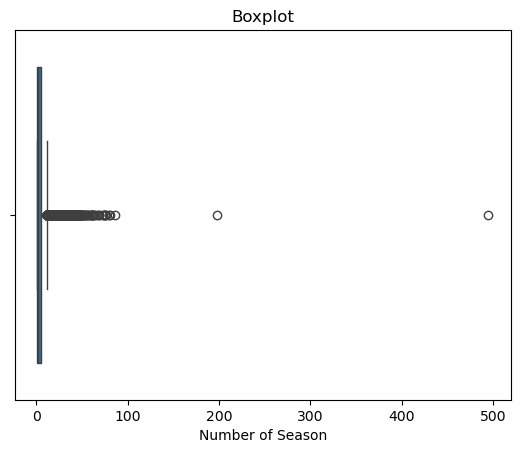

In [84]:
sns.boxplot(data = df, x="Number of Season")
plt.title(f"Boxplot")

In [85]:
df["Number of Season"].value_counts()

Number of Season
1     4456
2     1221
3      859
4      629
5      480
      ... 
60       1
66       1
53       1
55       1
63       1
Name: count, Length: 73, dtype: int64

In [86]:
df[df["Number of Season"]>20] 

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
3,World News Tonight with David Muir,ABC World News is the flagship daily evening t...,News,5.5,2634,8.0,English,United States,1948-08-11,True,Returning Series,32,108,30.0,No platforms available,No reviews,NaN,1948
6,Ninja Boy Rantaro,"Rantarō, Shinbei and Kirimaru are ninja appre...","Comedy, Action & Adventure, Kids, Animation, F...",6.3,2065,15.0,Japanese,Japan,1993-04-10,True,Returning Series,26,1753,30.0,U-NEXT,No reviews,NaN,1993
11,Klan,"Family is the most important thing, and the ch...",Soap,4.7,1734,7.0,Polish,Poland,1997-09-22,True,Returning Series,27,3564,25.0,No platforms available,No reviews,"Kaja Paschalska, Tomasz Bednarek, Barbara Burs...",1997
18,Coronation Street,The residents of Coronation Street are ordinar...,Soap,5.3,1567,110.0,English,Malaysia,1960-12-09,True,Returning Series,66,3936,24.0,No platforms available,If I were rating the Coronation Street classic...,William Roache,1960
29,Law of the Jungle,Law of the Jungle is a hybrid reality show com...,Reality,4.7,1285,7.0,Korean,"Korea, Republic of",2011-10-21,False,Ended,57,870,0.0,"Rakuten Viki, wavve, Claro tv+, Kocowa",No reviews,Kim Byung-man,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9476,KBS Drama Awards,The KBS Drama Awards is an awards ceremony pre...,Reality,8.0,45,1.0,Korean,"Korea, Republic of",1987-12-31,True,Returning Series,36,28,0.0,Viu,No reviews,NaN,1987
9596,On the Case with Paula Zahn,Award winning journalist Paula Zahn unravels s...,"Crime, Documentary",8.3,45,17.0,English,United States,2009-10-18,True,Returning Series,27,383,43.0,"Discovery+, Discovery +, Sky Go, Crime+ Invest...",No reviews,Paula Zahn,2009
9609,The Generation Game,The Generation Game was a British game show pr...,"Reality, Comedy",9.0,45,1.0,English,United Kingdom,1971-10-02,False,Ended,23,414,60.0,No platforms available,No reviews,"Jim Davidson, Bruce Forsyth, Larry Grayson",1971
9617,Eurovision Song Contest,The Eurovision Song Contest is an internationa...,Reality,7.1,45,28.0,English,Switzerland,1956-05-24,True,Returning Series,69,107,0.0,No platforms available,No reviews,"Petra Mede, Malin Åkerman",1956


In [87]:
df.loc[[df["Number of Season"].idxmax()]]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
5170,Lecture Room,NaN,"Talk, Documentary",10.0,75,1.0,Chinese,China,2001-07-09,True,Returning Series,495,6947,0.0,No platforms available,No reviews,NaN,2001


In [88]:
# eliminamos este outlier
df.drop(df[df["Number of Season"] == 495].index, inplace=True)

In [89]:
df.loc[df["Number of Season"]> 60].sort_values(by="Number of Season", ascending=False)
# es cierto que Pili tiene 86 temporadas 
# house hunters international tiene 198 temporadas 

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
7620,House Hunters International,This spin-off of the wildly popular House Hunt...,Reality,6.400,55,25.0,English,United States,2006-03-06,True,Returning Series,198,1579,23.0,"Discovery+, Discovery +, Hulu, Max, Discovery+...",No reviews,NaN,2006
4158,Pili,Pili is a puppet show from Taiwan. It is made ...,"Action & Adventure, Drama",7.400,88,6.0,Chinese,"Taiwan, Province of China",1988-06-01,True,Returning Series,86,2914,60.0,No platforms available,No reviews,NaN,1988
3881,Golden Globe Awards,An annual awards ceremony recognizing excellen...,Talk,6.800,93,14.0,English,United States,1944-01-20,True,Returning Series,81,81,130.0,Max,No reviews,NaN,1944
1319,Meet the Press,Meet the Press is a weekly American television...,"News, Talk",3.800,192,11.0,English,United States,1947-11-06,True,Returning Series,79,3241,56.5,No platforms available,No reviews,"Kristen Welker, Chuck Todd",1947
3484,Countdown,The clock is ticking as contestants compete in...,Reality,5.778,100,18.0,English,United Kingdom,1982-11-02,True,Returning Series,76,5756,40.5,No platforms available,No reviews,NaN,1982
6352,Ek Rishta Saajhedari Ka,NaN,Drama,NaN,64,NaN,Hindi,India,2016-08-09,False,Ended,75,160,22.0,Sony Liv,No reviews,"Kinshuk Vaidya, Shivya Pathania, Pubali Sanyal",2016
3165,今日、好きになりました。,NaN,Reality,NaN,108,NaN,Japanese,Japan,2017-05-20,True,Returning Series,75,383,0.0,No platforms available,No reviews,NaN,2017
3419,Sanremo Music Festival,The Sanremo Music Festival is the most popular...,"Family, Reality",7.600,101,14.0,Italian,Italy,1951-01-29,True,Returning Series,75,298,210.0,No platforms available,No reviews,NaN,1951
472,Tagesschau,"German daily news program, the oldest still ex...",News,6.800,360,237.0,German,Germany,1952-12-26,True,Returning Series,73,21205,15.0,No platforms available,No reviews,NaN,1952
333,Panorama,"Current affairs programme, featuring interview...","Documentary, News",6.200,396,13.0,English,United Kingdom,1953-11-11,True,Returning Series,73,1338,45.0,Tele2 Play,No reviews,NaN,1953


In [90]:
df.loc[df["Title"] == "Ek Rishta Saajhedari Ka", "Number of Season"]= 1

In [91]:
df.drop(df[df["Title"] == "今日、好きになりました。"].index, inplace=True)

In [92]:
df[df["Number of Season"]>40].groupby("release_year")["Number of Season"].size()

release_year
1944    1
1947    1
1951    1
1952    1
1953    1
1955    2
1956    2
1959    1
1960    2
1962    2
1963    3
1964    3
1968    1
1969    1
1970    1
1971    1
1972    4
1973    1
1974    2
1975    3
1976    1
1977    1
1978    2
1979    5
1981    1
1982    2
1983    3
1984    2
1985    2
1986    1
1988    1
1990    1
1996    1
1997    1
2000    1
2006    1
2007    1
2009    1
2011    2
2016    1
Name: Number of Season, dtype: int64

In [93]:
df[df["Number of Season"]>40].groupby("Origin Country")["Number of Season"].size()

Origin Country
Australia                     2
Austria                       1
Canada                        1
Chile                         1
China                         1
Germany                       9
Italy                         2
Japan                         1
Korea, Republic of            2
Malaysia                      1
Sweden                        1
Switzerland                   1
Taiwan, Province of China     2
United Kingdom               16
United States                24
Name: Number of Season, dtype: int64

In [ ]:
# US, UK y Germany son los Países con más series que tienen más de 40 temporadas

In [94]:
df.groupby("Origin Country").agg(num_series = ("Number of Season", "size"), avg_seasons = ("Number of Season", "mean")).sort_values(by="num_series", ascending=False)

,num_series,avg_seasons
Origin Country,,
United States,2038,6.280177
Japan,1934,1.960186
China,965,1.806218
"Korea, Republic of",848,1.788915
United Kingdom,484,10.737603
...,...,...
Bosnia and Herzegovina,1,1.000000
Latvia,1,4.000000
"Korea, Democratic People's Republic of",1,3.000000


In [95]:
# convierto release year a int
df["release_year"] = df["release_year"].astype(int)

In [96]:
df[(df["Number of Season"]> 40) &(df["release_year"]> 1990)]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
29,Law of the Jungle,Law of the Jungle is a hybrid reality show com...,Reality,4.7,1285,7.0,Korean,"Korea, Republic of",2011-10-21,False,Ended,57,870,0.0,"Rakuten Viki, wavve, Claro tv+, Kocowa",No reviews,Kim Byung-man,2011
159,Survivor,A reality show contest where sixteen or more c...,Reality,7.4,665,386.0,English,United States,2000-05-31,True,Returning Series,48,694,0.0,"Paramount+ Roku Premium Channel, Hulu, Paramou...",No reviews,Jeff Probst,2000
163,LOONA TV,"LOONA TV (이달의 소녀 탐구, Girl of the Month Inquiry...","Reality, Comedy",7.0,660,3.0,Korean,"Korea, Republic of",2016-10-12,False,Canceled,48,775,1.0,No platforms available,No reviews,"HeeJin, HyunJin, HaSeul, YeoJin, ViVi",2016
178,Ridiculousness,Rob Dyrdek takes the funniest amateur internet...,"Comedy, Talk, Reality",6.9,634,108.0,English,United States,2011-08-29,True,Returning Series,42,1560,26.0,"Paramount+ Roku Premium Channel, Sky Go, Tele2...",No reviews,"Rob Dyrdek, Chanel West Coast, Sterling 'Steel...",2011
1587,Alarm for Cobra 11: The Motorway Police,A long-running German television series about ...,"Drama, Comedy, Action & Adventure",6.5,172,117.0,German,Germany,1996-03-12,True,Returning Series,50,383,45.0,"Telia Play, Tivify, blutv, Go3, O2 TV, Molotov...",No reviews,NaN,1996
3097,"Diners, Drive-Ins and Dives",Host Guy Fieri takes a cross-country road trip...,"Documentary, Reality",6.6,110,60.0,English,United States,2007-04-23,True,Returning Series,51,666,22.0,"Discovery+, Discovery +, Hulu, Sky Go, Food Ne...",No reviews,Guy Fieri,2007
3147,Le Iene,"Comedy/satirical show, with sketches and repor...","News, Comedy",6.8,108,5.0,Italian,Italy,1997-09-22,True,Returning Series,48,291,160.0,No platforms available,No reviews,NaN,1997
5377,Chopped,"A high energy, fast paced cooking competition ...",Reality,6.2,73,56.0,English,United States,2009-01-13,True,Returning Series,61,769,52.0,"Discovery+, Discovery +, Hulu, Food Network, M...",No reviews,Ted Allen,2009
7620,House Hunters International,This spin-off of the wildly popular House Hunt...,Reality,6.4,55,25.0,English,United States,2006-03-06,True,Returning Series,198,1579,23.0,"Discovery+, Discovery +, Hulu, Max, Discovery+...",No reviews,NaN,2006


In [97]:
# puede parecer raro pero sí, la serie diners, drive-ins and dives tiene 51 temporadas a pesar de haberse estrenado en 2007
# he revisado en internet y el número de temporadas de estas series es correcto
# menos Le Iene y Alerta Cobra, vamos a cambiar los valores


In [98]:
df.loc[df["Title"] == "Le Iene", "Number of Season"]= 28

In [99]:
df.loc[df["Title"] == "Le Iene", "Number of Episodes"]= 938

In [100]:
df.loc[df["Title"] == "Alarm for Cobra 11: The Motorway Police", "Number of Season"]= 25

In [101]:
df[(df["Number of Season"]> 40) &(df["release_year"]> 1990)]
# casi todas las series que tienen más de 40 temporadas son reality tv

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
29,Law of the Jungle,Law of the Jungle is a hybrid reality show com...,Reality,4.7,1285,7.0,Korean,"Korea, Republic of",2011-10-21,False,Ended,57,870,0.0,"Rakuten Viki, wavve, Claro tv+, Kocowa",No reviews,Kim Byung-man,2011
159,Survivor,A reality show contest where sixteen or more c...,Reality,7.4,665,386.0,English,United States,2000-05-31,True,Returning Series,48,694,0.0,"Paramount+ Roku Premium Channel, Hulu, Paramou...",No reviews,Jeff Probst,2000
163,LOONA TV,"LOONA TV (이달의 소녀 탐구, Girl of the Month Inquiry...","Reality, Comedy",7.0,660,3.0,Korean,"Korea, Republic of",2016-10-12,False,Canceled,48,775,1.0,No platforms available,No reviews,"HeeJin, HyunJin, HaSeul, YeoJin, ViVi",2016
178,Ridiculousness,Rob Dyrdek takes the funniest amateur internet...,"Comedy, Talk, Reality",6.9,634,108.0,English,United States,2011-08-29,True,Returning Series,42,1560,26.0,"Paramount+ Roku Premium Channel, Sky Go, Tele2...",No reviews,"Rob Dyrdek, Chanel West Coast, Sterling 'Steel...",2011
3097,"Diners, Drive-Ins and Dives",Host Guy Fieri takes a cross-country road trip...,"Documentary, Reality",6.6,110,60.0,English,United States,2007-04-23,True,Returning Series,51,666,22.0,"Discovery+, Discovery +, Hulu, Sky Go, Food Ne...",No reviews,Guy Fieri,2007
5377,Chopped,"A high energy, fast paced cooking competition ...",Reality,6.2,73,56.0,English,United States,2009-01-13,True,Returning Series,61,769,52.0,"Discovery+, Discovery +, Hulu, Food Network, M...",No reviews,Ted Allen,2009
7620,House Hunters International,This spin-off of the wildly popular House Hunt...,Reality,6.4,55,25.0,English,United States,2006-03-06,True,Returning Series,198,1579,23.0,"Discovery+, Discovery +, Hulu, Max, Discovery+...",No reviews,NaN,2006


In [102]:
df.loc[[df["Number of Season"].idxmax()]]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
7620,House Hunters International,This spin-off of the wildly popular House Hunt...,Reality,6.4,55,25.0,English,United States,2006-03-06,True,Returning Series,198,1579,23.0,"Discovery+, Discovery +, Hulu, Max, Discovery+...",No reviews,NaN,2006


### NUMBER OF EPISODES

Text(0.5, 1.0, 'Histograma')

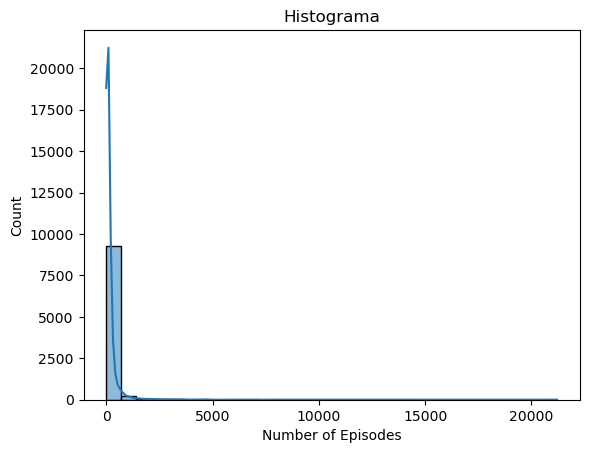

In [103]:
sns.histplot(data = df, x= "Number of Episodes", bins = 30, kde = True)
plt.title(f"Histograma")

In [104]:
df.loc[[df["Number of Episodes"].idxmin()]] 

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
3351,桂ちづる診察日録,NaN,NaN,NaN,103,NaN,Japanese,Japan,2010-09-04,True,Returning Series,1,1,0.0,No platforms available,No reviews,"Yui Ichikawa, Masanobu Takashima, Yuji Miyake,...",2010


In [105]:
# la elimino 
df.drop(df[df["Title"] == "桂ちづる診察日録"].index, inplace=True)

In [106]:
df.loc[[df["Number of Episodes"].idxmin()]] # claramente está mal, puesto que tiene 11 temporadas

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
4568,Berggespräche,NaN,Talk,NaN,82,NaN,German,Austria,2010-08-20,True,Returning Series,11,1,0.0,No platforms available,No reviews,"Philipp Jelinek, Nina Saurugg, Andreas Jäger",2010


In [107]:
df.loc[df["Title"] == "Berggespräche", "Number of Episodes"]= 122 # cambio el valor porque estaba mal /lo he buscado en internet

In [108]:
df.loc[df["Title"] == "Berggespräche", "Episode Duration"]= 45 # le asigno valor porque estaba a 0 /lo he buscado en internet

In [109]:
df.loc[[df["Number of Episodes"].idxmin()]] 

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
6991,My Mother,My Mother is an erotic manga by Thai artist XT...,NaN,8.0,59,2.0,Japanese,Japan,2023-04-14,True,Returning Series,1,1,0.0,No platforms available,No reviews,NaN,2023


In [110]:
# la elimino también
df.drop(df[df["Title"] == "My Mother"].index, inplace=True)


In [111]:
df.loc[[df["Number of Episodes"].idxmin()]] # es correcto, THE LEVELING OF SOLO LEVELING solo tiene 2 episodios

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
1499,THE LEVELING OF SOLO LEVELING,A two-part documentary that aims to explore th...,Documentary,10.0,178,1.0,English,United States,2024-03-04,False,Ended,1,2,21.0,"Crunchyroll Amazon Channel, Crunchyroll",No reviews,NaN,2024


In [112]:
df.loc[[df["Number of Episodes"].idxmax()]] 

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
472,Tagesschau,"German daily news program, the oldest still ex...",News,6.8,360,237.0,German,Germany,1952-12-26,True,Returning Series,73,21205,15.0,No platforms available,No reviews,NaN,1952


In [113]:
df.loc[df["Title"] == "Tagesschau", "Number of Episodes"]= 366 # cambio el valor porque estaba mal /lo he buscado en internet

In [114]:
df[df["Number of Episodes"]> 1000].sort_values(by =["Number of Episodes"], ascending=False)

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
625,Among Friends,Miklós introduces viewers into the world of Mo...,"Drama, Family",4.300,301,9.0,Hungarian,Hungary,1998-10-26,False,Ended,23,10456,12.0,No platforms available,No reviews,"Zoltán Szőke, Izabella Varga, Virág Pásztor, E...",1998
179,Neighbours,Neighbours is an Australian television soap op...,"Soap, Drama, Family, Comedy",6.100,632,52.0,English,Australia,1985-03-18,True,Returning Series,41,9191,26.0,No platforms available,No reviews,NaN,1985
149,Jeopardy!,America's favorite quiz show where contestants...,"Reality, Family",6.900,689,131.0,English,United States,1984-09-10,True,Returning Series,41,9045,26.0,fuboTV,No reviews,Johnny Gilbert,1984
1531,Home and Away,Home and Away is set in the fictional town of ...,"Drama, Soap",6.300,176,67.0,English,Australia,1988-01-18,True,Returning Series,38,8400,21.0,"Sky Go, MTV Katsomo, Strim, Tele2 Play, TV 2 Play",No reviews,NaN,1988
93,"Gute Zeiten, schlechte Zeiten","Gute Zeiten, schlechte Zeiten is a long-runnin...","Drama, Soap",5.714,830,35.0,German,Germany,1992-05-11,True,Returning Series,34,8217,23.0,RTL+,No reviews,"Wolfgang Bahro, Anne Menden",1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Rainbow,Children's puppet programme featuring music an...,"Comedy, Kids",6.700,832,20.0,English,United Kingdom,1972-10-16,False,Canceled,23,1044,17.5,No platforms available,No reviews,"Malcolm Lord, Roy Skelton, Geoffrey Hayes",1972
9213,Мужское / Женское,NaN,Talk,10.000,46,1.0,Russian,Russian Federation,2014-09-29,True,Returning Series,6,1032,50.0,No platforms available,No reviews,"Alexandr Gordon, Yuliya Baranovskaya",2014
7863,MasterChef Australia,MasterChef Australia is a Logie Award-winning ...,Reality,6.800,53,74.0,English,Australia,2009-04-27,True,Returning Series,17,1031,75.0,"Amazon Prime Video with Ads, Sky Go, Tele2 Pla...",No reviews,"Andy Allen, Poh Ling Yeow, Jean-Christophe Nov...",2009
221,La resistencia,NaN,"Talk, Comedy",6.050,575,20.0,Spanish,Spain,2018-02-01,True,Returning Series,8,1022,60.0,"Movistar Plus+, Movistar Plus+ Ficción Total",No reviews,"David Broncano, Grison, Ricardo Castella, Jorg...",2018


In [115]:
# elimino también la serie Among Friends porque no encuentro info de cuantos episodios tiene y me parecen demasiados
df.drop(df[df["Title"]== "Among Friends"].index, inplace = True)

In [116]:
df.groupby("Origin Country").agg(num_series = ("Number of Episodes", "size"), avg_episodes = ("Number of Episodes", "mean")).sort_values(by="num_series", ascending=False)

,num_series,avg_episodes
Origin Country,,
United States,2038,186.475466
Japan,1932,73.948240
China,965,76.738860
"Korea, Republic of",848,93.793632
United Kingdom,484,326.520661
...,...,...
Bosnia and Herzegovina,1,39.000000
Latvia,1,56.000000
"Korea, Democratic People's Republic of",1,153.000000


### EPISODE DURATION

Text(0.5, 1.0, 'Histograma')

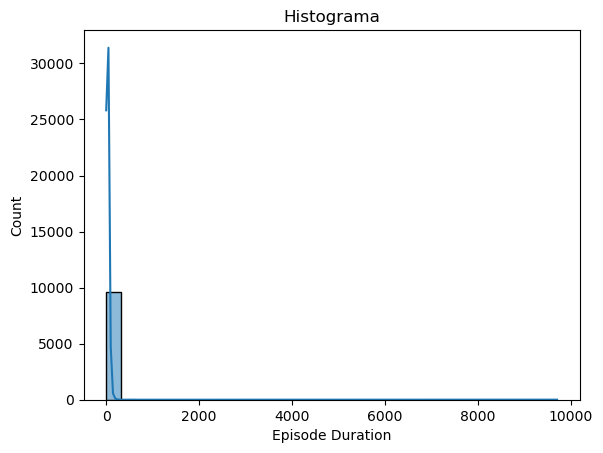

In [117]:
sns.histplot(data = df, x= "Episode Duration", bins = 30, kde = True)
plt.title(f"Histograma")

Text(0.5, 1.0, 'Boxplot')

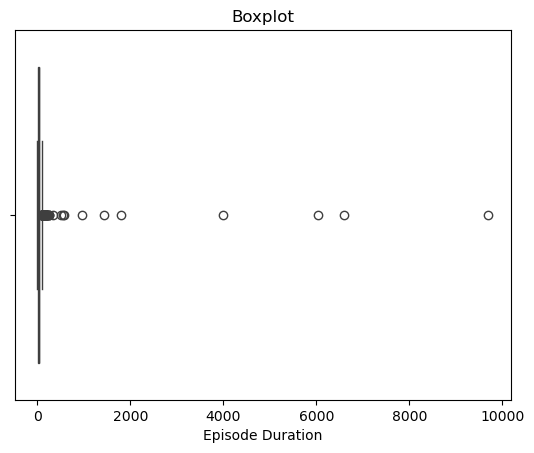

In [118]:
sns.boxplot(data = df, x="Episode Duration")
plt.title(f"Boxplot")

In [119]:
# lo convierto a int
df["Episode Duration"] = df["Episode Duration"].astype(int)

In [120]:
df.loc[[df["Episode Duration"].idxmax()]]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
5717,Boyei Gelo,"Set in the modern day Kolkata, tells the tale ...","Comedy, Drama, Family",NaN,70,NaN,English,India,2013-07-22,False,Ended,1,439,9700,No platforms available,No reviews,"Rohit Samanta, Basabdatta Chatterjee, Paran Ba...",2013


In [123]:
# la eliminamos
df.drop(df[df["Title"] == "Boyei Gelo"].index, inplace=True)


In [124]:
df.loc[[df["Episode Duration"].idxmax()]]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
6610,Bhootu,The story of a jolly little ghost.,"Comedy, Drama, Family",NaN,62,NaN,Bengali,India,2016-03-14,True,Returning Series,1,300,6600,No platforms available,No reviews,"Arshiya Mukherjee, Lily Chakravarty, Anindya C...",2016


In [125]:
# la eliminamos
df.drop(df[df["Title"] == "Bhootu"].index, inplace=True)

In [126]:
df.loc[df["Episode Duration"]>180]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
720,Morgenmagazin,NaN,"News, Talk",3.500,275,2.0,German,Germany,1992-07-19,True,Returning Series,34,3127,210,No platforms available,No reviews,NaN,1992
1577,Live & Kicking,Live & Kicking was a BBC Saturday morning chil...,NaN,5.300,172,6.0,English,United Kingdom,1993-10-02,False,Ended,8,256,187,No platforms available,No reviews,"Sarah Cawood, Katy Hill, Emma Forbes, Jamie Th...",1993
3419,Sanremo Music Festival,The Sanremo Music Festival is the most popular...,"Family, Reality",7.600,101,14.0,Italian,Italy,1951-01-29,True,Returning Series,75,298,210,No platforms available,No reviews,NaN,1951
3890,Polskie drogi,NaN,"War & Politics, Drama",7.000,92,4.0,Polish,Poland,1977-10-16,False,Ended,1,11,949,No platforms available,No reviews,Karol Strasburger,1977
4109,Viña del Mar International Song Festival,A yearly musical contest organized by the muni...,NaN,2.000,89,2.0,Spanish,Chile,1963-02-14,True,Returning Series,47,251,330,No platforms available,No reviews,"María Luisa Godoy, Martín Cárcamo",1963
4272,Al Zeer Salem,A historical series embodying the character of...,Drama,8.000,86,4.0,Arabic,Syrian Arab Republic,2000-11-27,False,Ended,1,40,1800,Shahid VIP,No reviews,"Salloum Haddad, Abed Fahed, Rafic Ali Ahmad, K...",2000
5453,Solos,NaN,"Reality, Talk",5.500,72,2.0,Spanish,Spain,2020-09-14,True,Returning Series,4,161,1440,No platforms available,No reviews,NaN,2020
5468,Os Batanetes,NaN,Comedy,NaN,72,NaN,Portuguese,Portugal,2004-06-01,False,Ended,5,133,3990,Amazon Prime Video,No reviews,"Victor de Sousa, Rita Ribeiro, Inês Castel-Bra...",2004
5951,Mnet Asian Music Awards,Mnet Asian Music Awards (MAMA) is a major Sout...,Reality,9.500,67,2.0,Korean,"Korea, Republic of",2009-11-21,True,Returning Series,17,66,240,No platforms available,No reviews,NaN,2009
6307,Mani,Sky's parents hire an unconventional nanny nam...,Comedy,7.600,64,8.0,English,United States,2017-08-30,True,Returning Series,8,70,515,No platforms available,No reviews,"Lawrence Wayne Curry, Chelsea Lascher",2017


In [136]:
df.loc[df["Title"] == "Polskie drogi", "Episode Duration"]= 85 # cambio el valor porque estaba mal /lo he buscado en internet

In [137]:
df.loc[df["Title"] == "Al Zeer Salem", "Episode Duration"]= 58 # cambio el valor porque estaba mal /lo he buscado en internet

In [139]:
df.loc[df["Title"] == "Solos", "Episode Duration"]= 150 # cambio el valor porque estaba mal /lo he buscado en internet

In [140]:
df.loc[df["Title"] == "Os Batanetes", "Episode Duration"]= 20 # cambio el valor porque estaba mal /lo he buscado en internet

In [141]:
df.loc[df["Title"] == "Mani", "Episode Duration"]= 12 # cambio el valor porque estaba mal /lo he buscado en internet

In [142]:
df.loc[df["Title"] == "The Whirlwind", "Episode Duration"]= 45 # cambio el valor porque estaba mal /lo he buscado en internet

elimino el resto

In [143]:
df.drop(df[df["Title"]== "Toward the Terra"].index, inplace = True)

In [144]:
df.drop(df[df["Title"]== "Tula Pahate Re"].index, inplace = True)

In [145]:
df.drop(df[df["Title"]== "Gaki no Tsukai No Laughing Batsu Game"].index, inplace = True)

In [146]:
df[df["Episode Duration"]== 0] # hay más de 1900 series sin duración de episodios

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
8,Squid Game,Hundreds of cash-strapped players accept a str...,"Action & Adventure, Mystery, Drama",7.900,1938,15382.0,Korean,"Korea, Republic of",2021-09-17,True,Returning Series,3,22,0,"Netflix basic with Ads, Netflix","Just totally worth it. | Visually excellent, t...","Lee Jung-jae, Lee Byung-hun, Yim Si-wan, Wi Ha...",2021
15,Volta por Cima,NaN,"Soap, Drama, Comedy",6.500,1600,12.0,Portuguese,Brazil,2024-09-30,True,Returning Series,1,114,0,No platforms available,No reviews,"Jéssica Ellen, Fabrício Boliveira, Milhem Cort...",2024
16,She's the One,"Beatriz Dourado, a young black woman marked by...","Soap, Drama",8.100,1591,9.0,Portuguese,Brazil,2024-11-04,True,Returning Series,1,95,0,No platforms available,No reviews,"Duda Santos, Pedro Novaes, Maisa Silva, Fábio ...",2024
21,Markus Lanz,TV presenter Markus Lanz invites prominent gue...,Talk,5.000,1468,10.0,German,Germany,2008-06-03,True,Returning Series,18,2042,0,No platforms available,No reviews,Markus Lanz,2008
25,Brothers,Ador is a well known and respected CIDG Police...,"Drama, Action & Adventure",6.600,1414,33.0,Tagalog,Philippines,2015-09-28,False,Ended,9,2013,0,No platforms available,No reviews,"Coco Martin, Julia Montes, Susan Roces, Jaime ...",2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,Roast,Roast is a Chinese stand-up comedy show. In ea...,"Comedy, Talk, Reality",7.400,44,5.0,Chinese,China,2017-01-08,False,Ended,5,51,0,No platforms available,No reviews,"Li Dan, Chen Zhuoxuan, Qin Hao, Wowkie Zhang, ...",2017
9680,Second Spring,Second Spring was a television series in Turke...,"Family, Drama",8.600,44,29.0,Turkish,Türkiye,1998-10-29,False,Ended,3,37,0,No platforms available,No reviews,"Türkan Şoray, Şener Şen, Tarık Papuççuoğlu, Ne...",1998
9682,Sweet Diva,Maria da Paz is a committed baker who becomes ...,"Drama, Comedy, Crime, Soap",6.875,44,16.0,Portuguese,Brazil,2019-05-20,False,Ended,1,161,0,"Atresplayer Amazon Channel, Vix Gratis Amazon ...",No reviews,"Juliana Paes, Agatha Moreira, Nathalia Dill, P...",2019
9685,Black Snow,"In 1995, seventeen-year-old Isabel Baker was m...",Crime,7.000,44,65.0,English,Australia,2023-01-01,True,Returning Series,2,12,0,"AMC+ Amazon Channel, MTV Katsomo, Spectrum On ...",No reviews,"Travis Fimmel, Jana McKinnon, Megan Smart, Dan...",2023


In [147]:
df["Title"] = df["Title"].str.lower()

In [148]:
# reemplazamos los valores 0 con los minutos reales

In [149]:
episode_duration= {
    'dexter': 50, 'game of thrones':60, 'the mentalist':40, 'ncis':44,
       'breaking bad':50, 'survivor':60, 'the blacklist':45, 'paradise':55,
       'shameless':50, 'desperate housewives':42, 'lost':43, 'bones':43, 'columbo':78,
       's.w.a.t.':43, 'the walking dead':50, 'fargo':52, 'the flash':43,
       'the late show with stephen colbert':46,
       'csi: crime scene investigation':43, 'community':20, 'stranger things':56,
       'two and a half men':22, 'the sopranos':60, 'the office':30, 'blue bloods':45,
       'seinfeld':24, 'seal team':43, 'the orville':44, 'better call saul':45,
       'newsradio':23, 'futurama':22, 'outlander':60, 'the x-files':50,
       'ghost whisperer':45, 'curb your enthusiasm':30,
       'buffy the vampire slayer':45, 'saturday night live':65,
       "rupaul's drag race":50, 'star trek: discovery':60, 'chernobyl':65,
       'mad men':47, 'jag':44, "tom clancy's jack ryan":60, 'westworld':60,
       "it's always sunny in philadelphia":20, 'web therapy':25,
       'star wars rebels':22, 'medium':45, 'arrested development':22, 'matlock':42,
       'succession':60, 'love, death & robots':15, 'orange is the new black':60,
       'mr. robot':60, 'narcos':50, 'the agency':50,
       'last week tonight with john oliver':32, 'in treatment':25,
       'the equalizer':44, 'what we do in the shadows':30, 'ozark':60, 'entourage':28,
       'days of our lives':60, 'shooter':41, 'little house on the prairie':60,
       'family ties':25, 'the umbrella academy':50, '13 reasons why':50,
       'house of cards':50, 'the marvelous mrs. maisel':57, 'justified':42,
       'deadliest catch':45, 'ballers':30, 'atlanta':30, 'honest trailers':7,
       'my name is earl':21, 'the leftovers':55, 'mindhunter':50, 'six feet under':55,
       'empire':42, 'bates motel':45, 'the six million dollar man':55,
       'naked and afraid':43, 'amazing stories':30, 'the ranch':30,
       'carpool karaoke: the series':18,
       'terminator: the sarah connor chronicles':43, 'the killing':50,
       'the life and legend of wyatt earp':30, 'life on mars':52, 'sense8':60,
       'battlestar galactica':44, 'masters of horror':60, 'the conners':22,
       'epic rap battles of history':5, 'russian doll':25,
       'naked and afraid xl':42, 'glow':35,'yellowstone':60, 'critical role':27, 'invincible':45, 'rt life':5,
       'paw patrol':22, 'severance':45, 'dexter: original sin':50,
       'from':50, 'beast games':50, 'the boys':60, 'animaniacs':23, 'the good doctor':42,
       'silo':50, 'high potential':43, 'young sheldon':20, 'the night agent':50,
       'teen wolf':43, 'hey qween!':38, 'euphoria':55, 'fear the walking dead':45,
       'lioness':45, 'house of the dragon':60, 'reacher':42,
       'the lord of the rings: the rings of power':60, 'arrow':43, 'snowfall':50,
       'arcane':45, 'xo, kitty':30, 'unhhhh':10, 'tulsa king':40, 'ted lasso':35,
       'the witcher':50, 'the jennifer hudson show':60, 'american primeval':50,
       'gossip girl':42, 'the 7d':30, 'the recruit':55, 'bridgerton':60, 'rwby chibi':11,
       'dune: prophecy':60, 'you':50, 'landman':55, 'what if...?':35, 'virgin river':45,
       'the white lotus':55, 'halo':60, '9-1-1: lone star':43,
       'mayor of kingstown':47, 'scorpion':40, 'wednesday':50,
       'white collar':42,'tracker':50, 'night gallery':50,
       'star wars: skeleton crew':40, 'see':54, 'the last of us':55, 'the penguin':60,
       'sex/life':45, 'lego ninjago: dragons rising':23, 'designated survivor':42,
       'common side effects':22, 'shōgun':60, 'hey! (ew)':30, 'tribunal justice':60,
       'mickey mouse clubhouse':23, 'vikings: valhalla':50,
       'the walking dead: daryl dixon':60, '1923':58, 'carnival row':55,
       'beverly hills, 90210':45, 'snowpiercer':45, 'castlevania':25,
       'the mandalorian':40, 'teacup':30, 'titans':45, 'dickinson':30,
       'the real housewives of beverly hills':43, 'the pitt':50,
       'narcos: mexico':60, 'mythic quest':30,
       'the walking dead: the ones who live':45, 'selling sunset':30, 'on call':30,
       'la fan':45, 'the summer i turned pretty':43, 'servant':30, 'wwe 24':30,
       'cupcake wars':42, 'battlefield friends':4, 'elsbeth':43,
       'the kardashians':40, 'karamo show':60, '1883':50, 'emily in paris':30,
       'schmigadoon!':30, 'the replacements':58, 'for all mankind':60,
       'loki':45, 'the wheel of time':60, 'obliterated':50,
       'agatha all along':40, 'the lincoln lawyer':50,
       'fire country':44, 'avatar the last airbender':60,
       'fallout':60, 'will trent':44, 'doc mcstuffins':24, 'creature commandos':23,
       'masters of the air':57, 'norman picklestripes':21, 'hawkeye':40,
       'the falcon and the winter soldier':50, 'highlander: the series':48,
       'the bold and the beautiful':22, 'mayfair witches':60, 'foundation':60,
       'looney tunes cartoons':10, 'invasion':55, 'school spirits':45,
       'peacemaker':43, 'cruel intentions':42, 'fresh off the boat':21,
       'little america':30, 'monsters':50,
       'chilling adventures of sabrina':57, 'shrinking':35, 'johnny bravo':22,
       'the morning show':55, 'wandavision':60, 'ikaw lamang':40,
       'castlevania: nocturne':27, 'only murders in the building':30,
       'the bear':37, 'rainbow high':10, "america's funniest home videos":38,
       'star wars: the bad batch':40, 'walker, texas ranger':43,
       "georgie & mandy's first marriage":20, 'star trek: picard':50,
       'goosebumps':22, 'sweet tooth':45, 'ncis: origins':43, 'cross':55,
       'raised by wolves':50, 'abbott elementary':22, 'one piece':23,
       'star trek: lower decks':30,
       'vindication':30, 'interior chinatown':40, 'the walking dead: dead city':44,
       'tell me lies':49, 'the sandman':50, 'the young turks':54, 'the dead zone':41,
       'superbuns':8, 'godfather of harlem':55, 'secret level':15, 'guidance':27,
       '3 body problem':50, 'disenchantment':30, 'the haunting of hill house':55,
       'my life with the walter boys':45, 'the madness':48, 'love, victor':24,
       'party down':30, 'the chi':60, 'el conde: amor y honor':60,
       "the queen's gambit":50, 'grown-ish':22, 'halloween wars':42,
        'knuckles':30, 'grotesquerie':45, "x-men '97":32,
       'presumed innocent':43, 'dark matter':43, 'roadkill':20,
       'american crime story':42, 'pawn stars':23, 'the irrational':42,
       'rooster teeth animated adventures':15,
       'star wars: andor':41, 'percy jackson and the olympians':40,
       'unusual suspects':42, 'dahmer - monster: the jeffrey dahmer story':50,
       'bossy bear':22, 'elena of avalor':25, 'the great':50, 'kingdom':50,
       'earth abides':52, 'say nothing':44, 'the rachel maddow show':60,
       'stargate origins':10, 'upload':32, 'a man on the inside':30,
       'she-hulk: attorney at law':35, 'those about to die':44, 'walker':42,
       'star trek: strange new worlds':55, 'adventure time: fionna & cake':27,
       'shape island':22, 'crown lake':30, "let's play minecraft":23,
       'monarch: legacy of monsters':60, 'the librarians':43,
       'dateline: unforgettable':85, 'bel-air':51,
       'bbq brawl':30, 'beauty in black':48, 'tabletop':32,
       'sausage party: foodtopia':25, 'the acolyte':40,
       'the shannara chronicles':42, 'the gilded age':54, 'pachinko':52,
       'black bird':58, 'the idol':50, 'the old man':55,
       'voltron: legendary defender':24, 'interview with the vampire':50,
       'ripley':55, 'pantheon':41, 'the flight attendant':45, 'world war two':45,
       'bookie':23, '61st street':45, 'nobody wants this':25, 'pupstruction':11,
       'sonic prime':26, 'poker face':58,
       "guillermo del toro's cabinet of curiosities":60, 'heels':58, 'the ark':43,
       'the continental: from the world of john wick':85, 'gayle':5,
       'sweat equity':20, 'tokyo vice':57, 'watchmen':59, 'ted':40,
       'expedition bigfoot':42, 'monsters at work':25, 'mr. corman':30,
       'the spiderwick chronicles':45, 'the terminal list':55,
       'smosh':5, 'american horror stories':43, 'yellowstone: one-fifty':40,
       'beef':35, 'maid':50, 'the angry video game nerd':30, 'joe pickett':48,
       'outer range':50, 'tumble leaf':22, 'unbelievable':50,
       'the mosquito coast':50, 'new york undercover':60,
       'rubble & crew':18, 'paradise run':23, 'and just like that…':40,
       'love is blind':55, 'acapulco':30, 'blue eye samurai':45, 'firefly lane':50,
       'life in pieces':22, 'human resources':28, "squid game":60
}

In [150]:
# Iteramos sobre las filas donde "Episode Duration" es 0
for index, row in df[df["Episode Duration"] == 0].iterrows():
    title = row["Title"]
    # Comprobar si el título está en el diccionario
    if title in episode_duration:
        # Usar loc[] para cambiar el valor en la fila correspondiente
        df.loc[df["Title"] == title, "Episode Duration"] = episode_duration[title]

In [151]:
df[df["Episode Duration"]== 0] # siguen siendo muchas 1563

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
15,volta por cima,NaN,"Soap, Drama, Comedy",6.500,1600,12.0,Portuguese,Brazil,2024-09-30,True,Returning Series,1,114,0,No platforms available,No reviews,"Jéssica Ellen, Fabrício Boliveira, Milhem Cort...",2024
16,she's the one,"Beatriz Dourado, a young black woman marked by...","Soap, Drama",8.100,1591,9.0,Portuguese,Brazil,2024-11-04,True,Returning Series,1,95,0,No platforms available,No reviews,"Duda Santos, Pedro Novaes, Maisa Silva, Fábio ...",2024
21,markus lanz,TV presenter Markus Lanz invites prominent gue...,Talk,5.000,1468,10.0,German,Germany,2008-06-03,True,Returning Series,18,2042,0,No platforms available,No reviews,Markus Lanz,2008
25,brothers,Ador is a well known and respected CIDG Police...,"Drama, Action & Adventure",6.600,1414,33.0,Tagalog,Philippines,2015-09-28,False,Ended,9,2013,0,No platforms available,No reviews,"Coco Martin, Julia Montes, Susan Roces, Jaime ...",2015
26,crazy about you,The story begins with the ambiguous relationsh...,"Soap, Drama, Mystery",5.400,1323,13.0,Portuguese,Brazil,2024-09-09,True,Returning Series,1,144,0,Globoplay,No reviews,"Gabz, Agatha Moreira, Chay Suede, Nicolas Prat...",2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,roast,Roast is a Chinese stand-up comedy show. In ea...,"Comedy, Talk, Reality",7.400,44,5.0,Chinese,China,2017-01-08,False,Ended,5,51,0,No platforms available,No reviews,"Li Dan, Chen Zhuoxuan, Qin Hao, Wowkie Zhang, ...",2017
9680,second spring,Second Spring was a television series in Turke...,"Family, Drama",8.600,44,29.0,Turkish,Türkiye,1998-10-29,False,Ended,3,37,0,No platforms available,No reviews,"Türkan Şoray, Şener Şen, Tarık Papuççuoğlu, Ne...",1998
9682,sweet diva,Maria da Paz is a committed baker who becomes ...,"Drama, Comedy, Crime, Soap",6.875,44,16.0,Portuguese,Brazil,2019-05-20,False,Ended,1,161,0,"Atresplayer Amazon Channel, Vix Gratis Amazon ...",No reviews,"Juliana Paes, Agatha Moreira, Nathalia Dill, P...",2019
9685,black snow,"In 1995, seventeen-year-old Isabel Baker was m...",Crime,7.000,44,65.0,English,Australia,2023-01-01,True,Returning Series,2,12,0,"AMC+ Amazon Channel, MTV Katsomo, Spectrum On ...",No reviews,"Travis Fimmel, Jana McKinnon, Megan Smart, Dan...",2023


1. creo un nuevo df que no tiene 0 en Episode Duration, pero me quedo con 7811 series

In [152]:
df_epdur = df[df["Episode Duration"]!= 0]

In [153]:
df_epdur # df donde ep duration no es nulo ni es 0 / 8069 series

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
0,gh dúo,NaN,Reality,7.3,2742,3.0,Spanish,Spain,2019-01-08,True,Returning Series,3,146,105,Tivify,No reviews,NaN,2019
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9.0,Chinese,China,2025-01-25,True,Returning Series,2,40,50,Netflix,No reviews,"Lu Yuxiao, Wang Xingyue, Ni Hongjie, Liu Xieni...",2025
2,love stories in the countryside,NaN,"Family, Comedy",6.5,2650,4.0,Chinese,China,2006-09-30,True,Returning Series,17,809,45,No platforms available,No reviews,"Zhao Benshan, Yu Yuexian, Wang Xiaobao, Tang J...",2006
3,world news tonight with david muir,ABC World News is the flagship daily evening t...,News,5.5,2634,8.0,English,United States,1948-08-11,True,Returning Series,32,108,30,No platforms available,No reviews,NaN,1948
4,running man,A reality and competition show where members a...,"Comedy, Reality",8.4,2416,180.0,Korean,"Korea, Republic of",2010-07-11,True,Returning Series,1,739,85,"wavve, Rakuten Viki, Viu, OnDemandKorea, Watch...",No reviews,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9689,prince of wolf,"A little boy, who was rescued by a pack of wol...","Drama, Comedy",6.8,44,4.0,Chinese,"Taiwan, Province of China",2016-07-03,False,Ended,1,30,75,No platforms available,No reviews,"Derek Chang, Amber An, Samuel Ku, Katie Chen, ...",2016
9691,the rolling girls,In a dystopian future where Japan's political ...,"Animation, Action & Adventure, Comedy, Sci-Fi ...",6.8,44,15.0,Japanese,Japan,2015-01-12,False,Ended,1,12,24,Hulu,No reviews,"Tomokazu Seki, Rina Hidaka, Risa Taneda, Ayumi...",2015
9692,the heaven sword and dragon saber,The Heaven Sword and Dragon Saber is a Chinese...,"Drama, Action & Adventure",5.4,44,6.0,Chinese,China,2009-10-23,False,Ended,1,40,45,Watcha,No reviews,"Deng Chao, He Zhuoyan, Ady An, Zhang Meng, Liu...",2009
9693,skeleton crew,"This is the story of Hunter and Anthony, a bea...","Comedy, Drama",1.0,44,1.0,English,United States,2015-10-31,True,Returning Series,5,63,30,No platforms available,No reviews,"Joshua R. Pangborn, Johnathan Cerio, Ashley Mo...",2015


2. Convierto los valores de Episode Duration = 0 a nulos

In [154]:
df["Episode Duration"] = np.where(df["Episode Duration"]== 0, np.nan, df["Episode Duration"])

In [155]:
df["Episode Duration"].value_counts(dropna=False)

Episode Duration
NaN      1563
45.0     1203
30.0      791
60.0      736
24.0      698
         ... 
123.0       1
117.0       1
139.0       1
87.0        1
73.0        1
Name: count, Length: 129, dtype: int64

In [156]:
df["In production"].value_counts(dropna=False) 

In production
False    7288
True     2344
Name: count, dtype: int64

In [157]:
df["Status"].value_counts()

Status
Ended               6880
Returning Series    2331
Canceled             408
In Production         11
Planned                2
Name: count, dtype: int64

In [158]:
# elimino las series que están in production y planned
df.drop(df[df["Status"].isin(["In Production", "Planned"])].index, inplace=True)

In [159]:
df["Status"].value_counts(dropna=False)

Status
Ended               6880
Returning Series    2331
Canceled             408
Name: count, dtype: int64

In [160]:
df.to_csv("df_analisis_general1.csv")

3. Pruebo a reemplazar los valores de Episode Duration iguales a 0 con la media por género y por País

In [161]:
df[["Genero"]]

,Genero
0,Reality
1,Drama
2,"Family, Comedy"
3,News
4,"Comedy, Reality"
...,...
9690,Drama
9691,"Animation, Action & Adventure, Comedy, Sci-Fi ..."
9692,"Drama, Action & Adventure"
9693,"Comedy, Drama"


In [162]:
# antes de poder hacer el explode tengo que hacer el split
df["Genero"] = df["Genero"].apply(lambda x: x.split(', ') if isinstance(x, str) else x)


In [163]:
df[["Genero"]]

,Genero
0,[Reality]
1,[Drama]
2,"[Family, Comedy]"
3,[News]
4,"[Comedy, Reality]"
...,...
9690,[Drama]
9691,"[Animation, Action & Adventure, Comedy, Sci-Fi..."
9692,"[Drama, Action & Adventure]"
9693,"[Comedy, Drama]"


In [164]:
df_expanded = df.explode("Genero") # separo los generos dentro de una misma serie
df_expanded.sample(2)

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
6739,strawberry panic!,Nagisa Aoi is a new transfer student into one ...,Animation,7.1,61,32.0,Japanese,Japan,2006-04-03,False,Ended,1,26,24.0,Crunchyroll,No reviews,"Ai Shimizu, Hitomi Nabatame, Mai Nakahara, Jun...",2006
6742,australian story,"Putting the ""real"" back into reality televisio...",News,4.8,61,5.0,English,Australia,1996-05-29,True,Returning Series,30,1067,30.0,No platforms available,No reviews,Leigh Sales,1996


In [165]:
df_expanded.shape

(19120, 18)

In [166]:
df_expanded["Genero"]

0                Reality
1                  Drama
2                 Family
2                 Comedy
3                   News
              ...       
9693              Comedy
9693               Drama
9694           Animation
9694    Sci-Fi & Fantasy
9694              Comedy
Name: Genero, Length: 19120, dtype: object

In [167]:
avg_duration_genre_country = df_expanded[df_expanded["Episode Duration"] != 0].groupby(["Genero", "Origin Country"])["Episode Duration"].mean()
avg_duration_genre_country

Genero              Origin Country
Action & Adventure  Argentina         52.500000
                    Australia         43.714286
                    Austria           45.000000
                    Belgium           41.666667
                    Brazil            46.545455
                                        ...    
Western             Brazil            45.000000
                    France            38.000000
                    Germany           25.000000
                    Japan             25.000000
                    United States     45.520833
Name: Episode Duration, Length: 636, dtype: float64

In [1221]:
def duration_0(fila): # quiero reemplazar la duración 0 por la media por pais y por genero
    if fila["Episode Duration"].isnull():
        generos = fila["Genero"]       
        pais = fila["Origin Country"]
        # calculamos la media por genero y pais
        avg = avg_duration_genre_country.get((generos, pais), None)
        if avg is not None:
            return avg
        else: # si no usamos la media global
            return df[df["Episode Duration"].notnull()]["Episode Duration"].mean()
    return fila["Episode Duration"]

In [1222]:
# df["Episode Duration"] = df.apply(duration_0, axis=1)

In [1223]:
# aplicamos la función al df en el que he hecho el exploded de los generos
df_expanded["Episode Duration"] = df_expanded.apply(duration_0, axis=1)

AttributeError: 'float' object has no attribute 'isnull'

In [ ]:
df_expanded[df_expanded["Episode Duration"]== 0] # ya no tengo

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year


In [ ]:
df_expanded["In production"].value_counts()

In production
False    14913
True      4241
Name: count, dtype: int64

In [ ]:
df_expanded["Status"].value_counts()

Status
Ended               14114
Returning Series     4219
Canceled              799
In Production          17
Planned                 5
Name: count, dtype: int64

In [ ]:
# elimino las series que están in production y planned
df_expanded.drop(df_expanded[df_expanded["Status"].isin(["In Production", "Planned"])].index, inplace=True)

In [ ]:
df_expanded["Status"].value_counts()

Status
Ended               14114
Returning Series     4219
Canceled              799
Name: count, dtype: int64

In [ ]:
df_expanded.to_csv("df_analisis_general.csv", sep="@")

In [ ]:
df_expanded["Origin Country"].value_counts()

Origin Country
Japan                                     5036
United States                             4279
China                                     1613
Korea, Republic of                        1490
United Kingdom                             802
                                          ... 
Montenegro                                   1
Bosnia and Herzegovina                       1
Dominican Republic                           1
Korea, Democratic People's Republic of       1
Latvia                                       1
Name: count, Length: 80, dtype: int64

In [ ]:
df_expanded[df_expanded["Origin Country"] == "United States"]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
3,world news tonight with david muir,ABC World News is the flagship daily evening t...,News,5.500,2634,8.0,English,United States,1948-08-11,True,Returning Series,32,108,30.0,No platforms available,No reviews,NaN,1948
28,tmz,"Based on the popular gossip website, this ente...",News,4.368,1288,19.0,English,United States,2007-09-10,True,Returning Series,5,672,30.0,fuboTV,No reviews,Harvey Levin,2007
28,tmz,"Based on the popular gossip website, this ente...",Comedy,4.368,1288,19.0,English,United States,2007-09-10,True,Returning Series,5,672,30.0,fuboTV,No reviews,Harvey Levin,2007
33,the chew,The Chew is an American talk show/cooking show...,Talk,5.500,1204,6.0,English,United States,2011-09-26,False,Ended,7,1229,60.0,No platforms available,No reviews,"Carla Hall, Clinton Kelly, Michael Symon",2011
40,american idol,"Each year, hopeful singers from all over the c...",Reality,5.078,1127,160.0,English,United States,2002-06-11,False,Ended,15,567,85.0,Tivify,"American idol, a season and series juggernaut,...","Jennifer Lopez, Ryan Seacrest, Keith Urban, Ha...",2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9679,the adventures of tintin,"Travel with Tintin, the young and intrepid Bel...",Animation,8.000,44,329.0,French,United States,1991-10-02,False,Ended,3,39,22.0,"Amazon Prime Video with Ads, Anime Digital Net...",No reviews,"Thierry Wermuth, Christian Pelissier, Henri La...",1991
9679,the adventures of tintin,"Travel with Tintin, the young and intrepid Bel...",Action & Adventure,8.000,44,329.0,French,United States,1991-10-02,False,Ended,3,39,22.0,"Amazon Prime Video with Ads, Anime Digital Net...",No reviews,"Thierry Wermuth, Christian Pelissier, Henri La...",1991
9681,party of five,Five brothers and sisters are determined to st...,Drama,7.000,44,111.0,English,United States,1994-09-12,False,Ended,6,142,42.0,"O2 TV, Amazon Prime Video, MovistarTV",Incredibly well-acted. Emotionally driven and ...,"Matthew Fox, Neve Campbell, Lacey Chabert, Sco...",1994
9693,skeleton crew,"This is the story of Hunter and Anthony, a bea...",Comedy,1.000,44,1.0,English,United States,2015-10-31,True,Returning Series,5,63,30.0,No platforms available,No reviews,"Joshua R. Pangborn, Johnathan Cerio, Ashley Mo...",2015


### GENERO, WHERE TO WATCH, CAST, REVIEWS

### Analisis Genero

In [ ]:
df["Genero"] # tengo los generos en una string juntos ["Talk, Comedy, News"]

0                                               [Reality]
1                                                 [Drama]
2                                        [Family, Comedy]
3                                                  [News]
4                                       [Comedy, Reality]
                              ...                        
9690                                              [Drama]
9691    [Animation, Action & Adventure, Comedy, Sci-Fi...
9692                          [Drama, Action & Adventure]
9693                                      [Comedy, Drama]
9694                [Animation, Sci-Fi & Fantasy, Comedy]
Name: Genero, Length: 9624, dtype: object

In [ ]:
# quiero sacar los generos unicos, para ello tengo que hacer split
# cojo cada genero que está después de la coma
df["Genero"] = df["Genero"].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
df["Genero"] # ahora los generos son listas de strings ["Talk", "Comedy", "News"]

0                                               [Reality]
1                                                 [Drama]
2                                        [Family, Comedy]
3                                                  [News]
4                                       [Comedy, Reality]
                              ...                        
9690                                              [Drama]
9691    [Animation, Action & Adventure, Comedy, Sci-Fi...
9692                          [Drama, Action & Adventure]
9693                                      [Comedy, Drama]
9694                [Animation, Sci-Fi & Fantasy, Comedy]
Name: Genero, Length: 9624, dtype: object

In [ ]:
# divido los generos combinados en filas separadas
generos_exploded = df.explode("Genero")
generos_exploded["Genero"]# separo los generos para que en la serie haya un unico genero

0                Reality
1                  Drama
2                 Family
2                 Comedy
3                   News
              ...       
9693              Comedy
9693               Drama
9694           Animation
9694    Sci-Fi & Fantasy
9694              Comedy
Name: Genero, Length: 19132, dtype: object

In [ ]:
# cuento los generos unicos
generos_count = generos_exploded["Genero"].value_counts()
generos_count.columns = ['Genero', 'Total']
generos_count # 18642

Genero
Drama                 4682
Comedy                3011
Animation             2137
Action & Adventure    1654
Sci-Fi & Fantasy      1504
Family                1114
Crime                  836
Mystery                688
Kids                   668
Reality                634
Soap                   612
Talk                   410
Documentary            265
War & Politics         180
News                   117
Western                 56
Desconocido             46
Name: count, dtype: int64

In [ ]:
# agrupamos los generos en 6
agrupacion_generos = {
    "Crime": "Drama",
    "Sci-Fi & Fantasy": "Action & Adventure",
    "Mystery": "Action & Adventure", 
    "Reality": "Entertainment",
    "Kids": "Family",
    "Talk": "Entertainment",
    "Western": "Documentary",
    "Soap": "Drama",
    "War & Politics": "Documentary",
    "News":"Entertainment",
    "Desconocido": "Entertainment"}

# Generos finales:
- Action & Adventure
- Animation
- Family
- Comedy
- Drama
- Entertainment
- Documentary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9624 entries, 0 to 9694
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Title               9624 non-null   object        
 1   Synopsis            8024 non-null   object        
 2   Genero              9106 non-null   object        
 3   Rating              8044 non-null   float64       
 4   Popularity          9624 non-null   int64         
 5   Vote Count          8044 non-null   float64       
 6   Original Language   9624 non-null   object        
 7   Origin Country      9624 non-null   object        
 8   First Air Date      9624 non-null   datetime64[ns]
 9   In production       9624 non-null   bool          
 10  Status              9624 non-null   object        
 11  Number of Season    9624 non-null   int64         
 12  Number of Episodes  9624 non-null   int64         
 13  Episode Duration    7802 non-null   float64       
 1

Antes de aplicar la función tengo que eliminar los nulos


In [ ]:
df_genero = df.copy()

In [ ]:
df_genero.dropna(subset=["Genero"], inplace = True)

In [ ]:
df_genero["Genero"].isna().sum()

0

In [ ]:
df_genero["Genero"] = df_genero["Genero"].apply(  # agrupo los generos en las 6 categorias
    lambda genero: list(set([agrupacion_generos[i] if i in agrupacion_generos else i for i in genero])))


In [ ]:
df_genero["Genero"].value_counts()

Genero
[Drama]                                                          2178
[Drama, Action & Adventure]                                       952
[Entertainment]                                                   726
[Comedy]                                                          594
[Drama, Comedy]                                                   559
                                                                 ... 
[Documentary, Animation, Comedy]                                    1
[Documentary, Entertainment, Family]                                1
[Entertainment, Drama, Action & Adventure, Comedy]                  1
[Documentary, Entertainment, Drama, Action & Adventure]             1
[Animation, Comedy, Entertainment, Action & Adventure, Drama]       1
Name: count, Length: 77, dtype: int64

### STATISTICS

In [1048]:
df_genero = df_genero.explode("Genero").reset_index(drop =True)
stats_genero = df_genero.groupby("Genero").agg({"Rating": ["mean", "count"], "Vote Count": "sum"}).reset_index()
stats_genero

Genero    Rating       Vote Count
                           mean count        sum
0  Action & Adventure  7.431923  2552  1096078.0
1           Animation  7.283174  1997   430104.0
2              Comedy  7.101291  2756   550968.0
3         Documentary  7.270231   425    57611.0
4               Drama  6.967152  4247  1245461.0
5       Entertainment  6.427514   907    30175.0
6              Family  7.024133  1321   185011.0

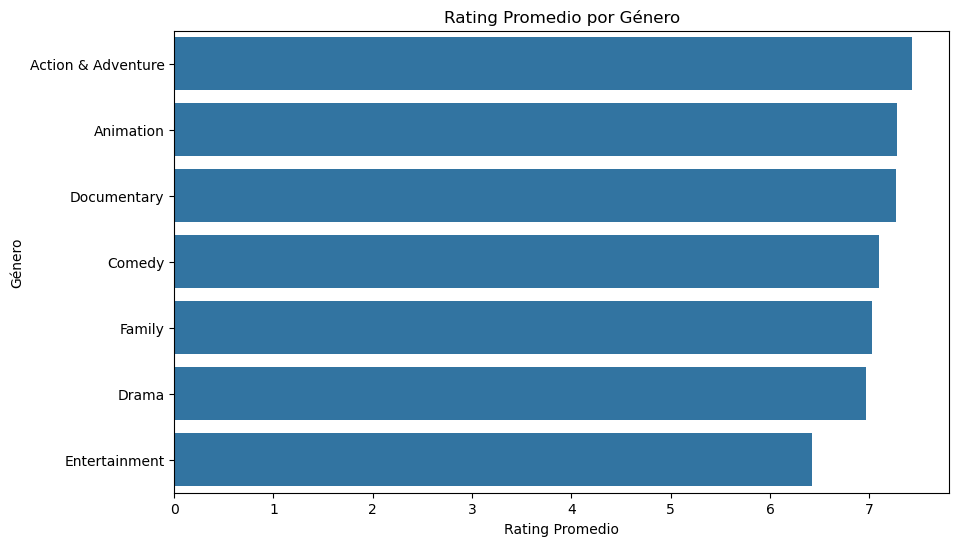

In [1052]:
genero_rating = df_genero.groupby("Genero")["Rating"].mean().reset_index()

# Visualización de rating promedio por género
plt.figure(figsize=(10, 6))
sns.barplot(x="Rating", y="Genero", data=genero_rating.sort_values("Rating", ascending=False))
plt.title("Rating Promedio por Género")
plt.xlabel("Rating Promedio")
plt.ylabel("Género")
plt.xticks()
plt.show()

In [1050]:
stats_genero.columns = ["Genero", "Media de rating", "Num series", "suma de vote count"]
# ordenar por número de series
stats_genero = stats_genero.sort_values(by = "Num series", ascending=False)
stats_genero.sort_values(by="Media de rating", ascending=False)

,Genero,Media de rating,Num series,suma de vote count
0,Action & Adventure,7.431923,2552,1096078.0
1,Animation,7.283174,1997,430104.0
3,Documentary,7.270231,425,57611.0
2,Comedy,7.101291,2756,550968.0
6,Family,7.024133,1321,185011.0
4,Drama,6.967152,4247,1245461.0
5,Entertainment,6.427514,907,30175.0


In [1051]:
stats_genero2 = df_genero.groupby("Origin Country").agg({"Rating": ["mean", "count"], "Genero": lambda x: x.mode()[0]}).reset_index()
stats_genero2.columns = ["Origin Country", "Media de rating", "Num series", "Genero más común"]
stats_genero2["Origin Country"] = stats_genero2["Origin Country"].str.split(',').str[0]
stats_genero2 = stats_genero2.drop_duplicates(subset="Origin Country")
stats_genero2 = stats_genero2.sort_values(by = "Num series", ascending=False)
stats_genero2

,Origin Country,Media de rating,Num series,Genero más común
36,Japan,7.424636,3933,Animation
76,United States,7.206028,3469,Drama
12,China,7.532783,1177,Drama
39,Korea,6.699464,1165,Drama
75,United Kingdom,6.721926,585,Drama
...,...,...,...,...
55,Puerto Rico,5.700000,1,Drama
32,Iraq,9.000000,1,Comedy
38,Kazakhstan,NaN,0,Drama
40,Latvia,NaN,0,Drama


In [ ]:
# vuelvo a separar los generos con el split y el explode para guardar el df en un csv
df_genero["Genero"] = df_genero["Genero"].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
df_genero_exploded = df_genero.explode("Genero")
df_genero_exploded["Genero"].value_counts()

Genero
Drama                 5054
Comedy                3018
Action & Adventure    2735
Animation             2139
Family                1538
Entertainment         1100
Documentary            498
Name: count, dtype: int64

In [ ]:
df_genero_exploded

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
0,gh dúo,NaN,Entertainment,7.3,2742,3,Spanish,Spain,2019-01-08,True,Returning Series,3,146,105.0,Tivify,No reviews,NaN,2019
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9,Chinese,China,2025-01-25,True,Returning Series,2,40,50.0,Netflix,No reviews,"Lu Yuxiao, Wang Xingyue, Ni Hongjie, Liu Xieni...",2025
2,love stories in the countryside,NaN,Comedy,6.5,2650,4,Chinese,China,2006-09-30,True,Returning Series,17,809,45.0,No platforms available,No reviews,"Zhao Benshan, Yu Yuexian, Wang Xiaobao, Tang J...",2006
3,love stories in the countryside,NaN,Family,6.5,2650,4,Chinese,China,2006-09-30,True,Returning Series,17,809,45.0,No platforms available,No reviews,"Zhao Benshan, Yu Yuexian, Wang Xiaobao, Tang J...",2006
4,world news tonight with david muir,ABC World News is the flagship daily evening t...,Entertainment,5.5,2634,8,English,United States,1948-08-11,True,Returning Series,32,108,30.0,No platforms available,No reviews,NaN,1948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16077,skeleton crew,"This is the story of Hunter and Anthony, a bea...",Drama,1.0,44,1,English,United States,2015-10-31,True,Returning Series,5,63,30.0,No platforms available,No reviews,"Joshua R. Pangborn, Johnathan Cerio, Ashley Mo...",2015
16078,skeleton crew,"This is the story of Hunter and Anthony, a bea...",Comedy,1.0,44,1,English,United States,2015-10-31,True,Returning Series,5,63,30.0,No platforms available,No reviews,"Joshua R. Pangborn, Johnathan Cerio, Ashley Mo...",2015
16079,disgaea,"Laharl, the demon prince of the Netherworld an...",Animation,7.0,44,4,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,"U-NEXT, Crunchyroll Amazon Channel, Crunchyroll",No reviews,"Hironori Miyata, Tomoe Hanba, Tomomichi Nishim...",2006
16080,disgaea,"Laharl, the demon prince of the Netherworld an...",Comedy,7.0,44,4,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,"U-NEXT, Crunchyroll Amazon Channel, Crunchyroll",No reviews,"Hironori Miyata, Tomoe Hanba, Tomomichi Nishim...",2006


In [ ]:
df_genero_exploded["Rating"].value_counts(dropna=False)

Rating
NaN      1855
8.000     828
7.000     689
6.000     584
7.500     430
         ... 
7.184       1
6.471       1
6.881       1
4.984       1
7.039       1
Name: count, Length: 975, dtype: int64

In [ ]:
df_genero_exploded.shape # porque hay series con más de un genero

(16082, 18)

In [ ]:
df_genero_exploded.groupby("Origin Country").size()

Origin Country
Argentina                              79
Australia                             109
Austria                                31
Bangladesh                              5
Belgium                                75
                                     ... 
United States                        3522
Venezuela, Bolivarian Republic of      34
XC                                      1
XG                                      1
YU                                      2
Length: 83, dtype: int64

In [ ]:
df_genero_exploded.to_csv("df_analisis_generos.csv") # uso este df para el analisis de los generos en Tableau

In [ ]:
df_genero_exploded[df_genero_exploded["Title"] =="house hunters international"]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
12695,house hunters international,This spin-off of the wildly popular House Hunt...,Entertainment,6.4,55,25,English,United States,2006-03-06,True,Returning Series,198,1579,23.0,"Discovery+, Discovery +, Hulu, Max, Discovery+...",No reviews,NaN,2006


### Analisis Actores

In [ ]:
df["Cast"].isna().sum()


512

In [ ]:
# cogemos todos Gonza

In [ ]:
df_actores = df.copy()

df_actores = df[df["Original Language"].isin(["Spanish", "English"])] 
# tenemos unas 3000 series inglesas/americanas y en español
df_actores

In [ ]:
df_actores.dropna(subset=["Cast"], inplace=True)
df_actores["Cast"].isna().sum()
df_actores

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
1,perfect match,In the bustling capital of Bianjing during the...,[Drama],8.9,2731,9,Chinese,China,2025-01-25,True,Returning Series,2,40,50.000000,Netflix,No reviews,"Lu Yuxiao, Wang Xingyue, Ni Hongjie, Liu Xieni...",2025
2,love stories in the countryside,NaN,"[Family, Comedy]",6.5,2650,4,Chinese,China,2006-09-30,True,Returning Series,17,809,45.000000,No platforms available,No reviews,"Zhao Benshan, Yu Yuexian, Wang Xiaobao, Tang J...",2006
4,running man,A reality and competition show where members a...,"[Comedy, Reality]",8.4,2416,180,Korean,"Korea, Republic of",2010-07-11,True,Returning Series,1,739,85.000000,"wavve, Rakuten Viki, Viu, OnDemandKorea, Watch...",No reviews,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",2010
5,family affairs,Focuses on the lives of residents in the ficti...,"[Drama, Soap]",2.6,2295,5,English,United Kingdom,1997-03-30,False,Ended,9,2132,30.000000,No platforms available,No reviews,"Richard Hawley, Florence Hoath, Nicola Duffett...",1997
7,the fearless,"Luo Yingzi, a self-taught lawyer who, after pe...",[Drama],5.8,1976,4,Chinese,China,2023-11-03,True,Returning Series,2,78,45.000000,No platforms available,No reviews,"Rayza, Wang Yang, Chuai Ni, Huang Jue, Shen Yujie",2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9690,我们生活的年代,NaN,[Drama],7.0,44,1,Chinese,China,2008-09-24,False,Ended,1,29,44.254032,No platforms available,No reviews,"Liu Ye, Yi Sha, Li Guangjie, Zhao Ziqi, Li Qian",2008
9691,the rolling girls,In a dystopian future where Japan's political ...,"[Animation, Action & Adventure, Comedy, Sci-Fi...",6.8,44,15,Japanese,Japan,2015-01-12,False,Ended,1,12,24.000000,Hulu,No reviews,"Tomokazu Seki, Rina Hidaka, Risa Taneda, Ayumi...",2015
9692,the heaven sword and dragon saber,The Heaven Sword and Dragon Saber is a Chinese...,"[Drama, Action & Adventure]",5.4,44,6,Chinese,China,2009-10-23,False,Ended,1,40,45.000000,Watcha,No reviews,"Deng Chao, He Zhuoyan, Ady An, Zhang Meng, Liu...",2009
9693,skeleton crew,"This is the story of Hunter and Anthony, a bea...","[Comedy, Drama]",1.0,44,1,English,United States,2015-10-31,True,Returning Series,5,63,30.000000,No platforms available,No reviews,"Joshua R. Pangborn, Johnathan Cerio, Ashley Mo...",2015


In [ ]:
df_actores = df_actores.explode("Cast").explode("Genero")# no puedo hacer explode
df_actores

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9,Chinese,China,2025-01-25,True,Returning Series,2,40,50.0,Netflix,No reviews,"Lu Yuxiao, Wang Xingyue, Ni Hongjie, Liu Xieni...",2025
2,love stories in the countryside,NaN,Family,6.5,2650,4,Chinese,China,2006-09-30,True,Returning Series,17,809,45.0,No platforms available,No reviews,"Zhao Benshan, Yu Yuexian, Wang Xiaobao, Tang J...",2006
2,love stories in the countryside,NaN,Comedy,6.5,2650,4,Chinese,China,2006-09-30,True,Returning Series,17,809,45.0,No platforms available,No reviews,"Zhao Benshan, Yu Yuexian, Wang Xiaobao, Tang J...",2006
4,running man,A reality and competition show where members a...,Comedy,8.4,2416,180,Korean,"Korea, Republic of",2010-07-11,True,Returning Series,1,739,85.0,"wavve, Rakuten Viki, Viu, OnDemandKorea, Watch...",No reviews,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",2010
4,running man,A reality and competition show where members a...,Reality,8.4,2416,180,Korean,"Korea, Republic of",2010-07-11,True,Returning Series,1,739,85.0,"wavve, Rakuten Viki, Viu, OnDemandKorea, Watch...",No reviews,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9693,skeleton crew,"This is the story of Hunter and Anthony, a bea...",Comedy,1.0,44,1,English,United States,2015-10-31,True,Returning Series,5,63,30.0,No platforms available,No reviews,"Joshua R. Pangborn, Johnathan Cerio, Ashley Mo...",2015
9693,skeleton crew,"This is the story of Hunter and Anthony, a bea...",Drama,1.0,44,1,English,United States,2015-10-31,True,Returning Series,5,63,30.0,No platforms available,No reviews,"Joshua R. Pangborn, Johnathan Cerio, Ashley Mo...",2015
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Animation,7.0,44,4,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,"U-NEXT, Crunchyroll Amazon Channel, Crunchyroll",No reviews,"Hironori Miyata, Tomoe Hanba, Tomomichi Nishim...",2006
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Sci-Fi & Fantasy,7.0,44,4,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,"U-NEXT, Crunchyroll Amazon Channel, Crunchyroll",No reviews,"Hironori Miyata, Tomoe Hanba, Tomomichi Nishim...",2006


In [ ]:
# Verifico el tipo de los datos en "Cast"
print(df_actores["Cast"].apply(type).value_counts()) # son una string

Cast
<class 'str'>    18333
Name: count, dtype: int64


In [ ]:
df_actores["Cast"].value_counts()

Cast
Tetsuya Kakihara, Aya Hirano, Rie Kugimiya, Yuichi Nakamura, Sayaka Ohara           8
Jason Ritter, Kristen Schaal, Alex Hirsch, Linda Cardellini                         7
Kouta Satou, Soichiro Hoshi, Mai Nakahara, Mana Hirata, Kaoru Mizuhara              7
Markus Lanz                                                                         7
Mamoru Miyano, Yuto Uemura, Masaaki Mizunaka, Hiroyuki Yoshino, Sumire Morohoshi    7
                                                                                   ..
Kim Gyu-ri, Hong Soo-hyun, Han Go-eun, Lee Min-young, Lee Jong-won                  1
Sana Amin Sheikh, Vibhav Roy, Parvati Sehgal, Shritama Mukherjee, Soni Singh        1
Odeya Rush, Daniel Litman, Eliana Tidhar                                            1
Cheung Tat-Ming, Vincent Kok Tak-Chiu, Sheila Chan Suk-Lan, Elle Choi, Yang Yu      1
Lu Yuxiao, Wang Xingyue, Ni Hongjie, Liu Xiening, Chen Heyi                         1
Name: count, Length: 9076, dtype: int64

In [ ]:
# los tengo que pasar a lista
# Convertir las strings separadas por comas a listas
df_actores["Cast"] = df_actores["Cast"].apply(lambda x: x.split(", ") if isinstance(x, str) else x)

In [ ]:
pd.set_option('display.max_rows', None)


In [ ]:
# ahora puedo aplicar el explode
df_actores = df_actores.explode("Cast")
# elimino la columna de plataformas porque me está creando problemas
df_actores.drop(columns = ["Where to Watch"], inplace=True)

In [ ]:
df_actores["Cast"].isna().sum() # por cada serie tenemos los primeros 5 actores principales


0

In [ ]:
df_actores

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Reviews,Cast,release_year
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9,Chinese,China,2025-01-25,True,Returning Series,2,40,50.0,No reviews,Lu Yuxiao,2025
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9,Chinese,China,2025-01-25,True,Returning Series,2,40,50.0,No reviews,Wang Xingyue,2025
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9,Chinese,China,2025-01-25,True,Returning Series,2,40,50.0,No reviews,Ni Hongjie,2025
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9,Chinese,China,2025-01-25,True,Returning Series,2,40,50.0,No reviews,Liu Xiening,2025
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9,Chinese,China,2025-01-25,True,Returning Series,2,40,50.0,No reviews,Chen Heyi,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Comedy,7.0,44,4,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,No reviews,Hironori Miyata,2006
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Comedy,7.0,44,4,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,No reviews,Tomoe Hanba,2006
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Comedy,7.0,44,4,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,No reviews,Tomomichi Nishimura,2006
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Comedy,7.0,44,4,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,No reviews,Kaori Mizuhashi,2006


In [ ]:
df_actores.drop(columns=["Reviews"], inplace = True)

In [ ]:
df_actores.to_csv("df_analisis_actores.csv", sep="@") # 
#por qué si no hay nulos, cuando lo exporto a Tableau me aparecen nulos en Cast??

In [ ]:
# sacamos el rating promedio por actor
actor_rating = df_actores.groupby("Cast")["Rating"].mean().reset_index()
actor_rating.rename(columns = {"Rating": "Avg_rating"}, inplace=True)
print(actor_rating)

                      Cast  Avg_rating
0      "Weird Al" Yankovic       6.100
1                     A-in         NaN
2             A.J. Buckley       8.000
3               A.J. Lamas         NaN
4            A.J. LoCascio       7.337
...                    ...         ...
24323                  임진웅       7.700
24324                  임형찬         NaN
24325                  정진욱         NaN
24326                  조수지         NaN
24327                  홍수민       5.800

[24328 rows x 2 columns]


In [ ]:
# sacamos el genero más común por actor
actor_genero = df_actores.groupby("Cast")["Genero"].apply(lambda x: x.mode()[0] if not x.mode().empty else "Unknown").reset_index()
actor_genero.rename(columns = {"Genero": "Most_common_genre"}, inplace=True)

print(actor_genero)

                      Cast   Most_common_genre
0      "Weird Al" Yankovic              Comedy
1                     A-in               Drama
2             A.J. Buckley  Action & Adventure
3               A.J. Lamas               Drama
4            A.J. LoCascio  Action & Adventure
...                    ...                 ...
24323                  임진웅  Action & Adventure
24324                  임형찬                Kids
24325                  정진욱              Comedy
24326                  조수지                Kids
24327                  홍수민               Drama

[24328 rows x 2 columns]


In [ ]:
# Eliminamos las filas duplicadas para cada actor y serie
df_actores_unicos = df_actores.drop_duplicates(subset=["Cast", "Title"])

In [ ]:
# sacamos el número de series que aparece cada actor
serie_actor = df_actores_unicos.groupby("Cast").size().reset_index(name="numero_series")

In [ ]:
serie_actor.sort_values(by=["numero_series"], ascending=False)

,Cast,numero_series
10599,Kana Hanazawa,43
15523,Miyuki Sawashiro,38
20978,Takahiro Sakurai,38
23457,Yuichi Nakamura,37
1940,Ayako Kawasumi,35
...,...,...
9060,Jelena Jovanova,1
9058,Jeffrey Tambor,1
9057,Jeffrey Lynn,1
9056,Jeffrey Hunter,1


In [ ]:
df_actores_unicos[df_actores_unicos["Cast"] == "Frank Welker"]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Cast,release_year
381,the smurfs,Classic Saturday-morning cartoon series featur...,Animation,6.946,402,493,English,United States,1981-09-12,False,Ended,9,422,16.500000,Frank Welker,1981
1517,muppet babies,"The Muppet Babies (Kermit, Piggy, Gonzo, Fozzy...",Animation,7.941,177,118,English,United States,1984-11-05,False,Ended,7,107,25.000000,Frank Welker,1984
2338,bonkers,Bonkers is an animated American television ser...,Animation,6.600,134,40,English,United States,1993-09-04,False,Ended,1,65,30.000000,Frank Welker,1993
2451,histeria!,Perhaps the world's only animated sketch-comed...,Animation,6.400,129,10,English,United States,1998-09-14,False,Ended,2,52,30.000000,Frank Welker,1998
2536,transformers: prime,"Roll out with Optimus Prime, Bumblebee, Arcee,...",Action & Adventure,8.000,126,438,English,United States,2010-11-26,False,Ended,3,65,21.000000,Frank Welker,2010
3152,garfield and friends,"The animated stories of Garfield the cat, Odie...",Animation,7.200,108,352,English,United States,1988-09-17,False,Ended,7,363,23.000000,Frank Welker,1988
3446,scooby-doo! mystery incorporated,This incarnation of the popular cartoon series...,Animation,8.224,100,1019,English,United States,2010-07-12,False,Ended,2,52,22.000000,Frank Welker,2010
3557,the real ghostbusters,The continuing adventures of paranormal invest...,Action & Adventure,7.700,98,265,English,United States,1986-09-13,False,Ended,7,140,25.000000,Frank Welker,1986
4166,"what's new, scooby-doo?","Scooby-Doo and the Mystery, Inc. gang are laun...",Animation,7.865,88,641,English,United States,2002-09-14,False,Ended,3,42,22.000000,Frank Welker,2002
4527,ducktales,Scrooge McDuck finds his hands full at home wh...,Animation,7.600,83,650,English,United States,1987-09-18,False,Ended,4,101,46.253041,Frank Welker,1987


In [ ]:
pd.set_option('display.max_rows', 5)

In [ ]:
# Combinamos los df de los actores: ratings, géneros y número de series
actor_analysis = pd.merge(actor_rating, actor_genero, on="Cast", how="inner")
actor_analysis = pd.merge(actor_analysis, serie_actor, on="Cast", how="inner")
actor_analysis_sorted = actor_analysis.sort_values(by="numero_series", ascending= False)

In [ ]:
actor_analysis_sorted.head(40)

,Cast,Avg_rating,Most_common_genre,numero_series
10599,Kana Hanazawa,7.402583,Animation,43
15523,Miyuki Sawashiro,7.556157,Animation,38
20978,Takahiro Sakurai,7.444538,Animation,38
23457,Yuichi Nakamura,7.282773,Animation,37
1940,Ayako Kawasumi,7.239980,Animation,35
21733,Tomokazu Seki,7.563021,Animation,35
294,Ai Kayano,7.434822,Animation,34
18300,Rie Kugimiya,7.454054,Animation,33
23190,Yoko Hikasa,7.336470,Animation,31
416,Akira Ishida,7.257202,Animation,30


### Analisis Plataformas

In [601]:
df[df["Where to Watch"]== "No platforms available"] # elimino los que no tienen plataforma?? para el estudio...

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
2,love stories in the countryside,NaN,"[Family, Comedy]",6.5,2650,4,Chinese,China,2006-09-30,True,Returning Series,17,809,45.000000,No platforms available,No reviews,"Zhao Benshan, Yu Yuexian, Wang Xiaobao, Tang J...",2006
3,world news tonight with david muir,ABC World News is the flagship daily evening t...,[News],5.5,2634,8,English,United States,1948-08-11,True,Returning Series,32,108,30.000000,No platforms available,No reviews,NaN,1948
5,family affairs,Focuses on the lives of residents in the ficti...,"[Drama, Soap]",2.6,2295,5,English,United Kingdom,1997-03-30,False,Ended,9,2132,30.000000,No platforms available,No reviews,"Richard Hawley, Florence Hoath, Nicola Duffett...",1997
7,the fearless,"Luo Yingzi, a self-taught lawyer who, after pe...",[Drama],5.8,1976,4,Chinese,China,2023-11-03,True,Returning Series,2,78,45.000000,No platforms available,No reviews,"Rayza, Wang Yang, Chuai Ni, Huang Jue, Shen Yujie",2023
10,la casa de los famosos colombia,NaN,[Reality],6.3,1812,25,Spanish,Colombia,2024-02-11,True,Returning Series,2,150,90.000000,No platforms available,No reviews,Carla Giraldo,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,second spring,Second Spring was a television series in Turke...,"[Family, Drama]",8.6,44,29,Turkish,Türkiye,1998-10-29,False,Ended,3,37,107.050000,No platforms available,No reviews,"Türkan Şoray, Şener Şen, Tarık Papuççuoğlu, Ne...",1998
9688,kluci v akci,NaN,NaN,8.0,44,1,Czech,Czechia,2005-09-05,True,Returning Series,1,644,25.000000,No platforms available,No reviews,"Ondřej Slanina, Filip Sajler",2005
9689,prince of wolf,"A little boy, who was rescued by a pack of wol...","[Drama, Comedy]",6.8,44,4,Chinese,"Taiwan, Province of China",2016-07-03,False,Ended,1,30,75.000000,No platforms available,No reviews,"Derek Chang, Amber An, Samuel Ku, Katie Chen, ...",2016
9690,我们生活的年代,NaN,[Drama],7.0,44,1,Chinese,China,2008-09-24,False,Ended,1,29,44.254032,No platforms available,No reviews,"Liu Ye, Yi Sha, Li Guangjie, Zhao Ziqi, Li Qian",2008


In [602]:
df_platform = df_genero.copy()

In [603]:
# plataformas
# convertimos a lista para poder hacer el explode
df_platform["Where to Watch"] = df_platform["Where to Watch"].apply(lambda x: x.split(", ") if isinstance(x, str) else [])

In [604]:
df_platform = df_platform.explode("Where to Watch").reset_index(drop =True)

In [605]:
df_platform["Where to Watch"].nunique() # hay demasiadas plataformas 382, las tengo que agrupar

382

In [606]:
stats_platform = df_platform.groupby("Where to Watch").agg({"Rating": ["mean", "count"], "Vote Count": "sum"}).reset_index()


In [607]:
stats_platform.columns = ["Platform", "Media de rating", "Num series", "suma de vote count"]
# ordenar por número de series
stats_platform = stats_platform.sort_values(by = "Num series", ascending=False)
stats_platform

,Platform,Media de rating,Num series,suma de vote count
232,No platforms available,6.710937,2801,80069
27,Amazon Prime Video,7.292525,1487,801496
228,Netflix,7.642951,1182,882442
230,Netflix basic with Ads,7.657202,1083,850364
163,Hulu,7.574903,1075,564740
...,...,...,...,...
350,Vice TV,6.600000,1,28
109,DocPlay,7.600000,1,15
262,Pongalo Amazon Channel,NaN,0,20
100,CuriosityStream Apple TV Channel,NaN,0,10


In [608]:
stats_platform.Platform.value_counts()

Platform
No platforms available                          1
OUTtv Apple TV Channel                          1
Studiocanal Presents Amazon Channel             1
Studiocanal Presents ALLSTARS Amazon Channel    1
TLC                                             1
                                               ..
ZDF Select Amazon Channel                       1
Apple TV Plus Amazon Channel                    1
Apple TV Plus                                   1
TV+                                             1
CuriosityStream Amazon Channel                  1
Name: count, Length: 382, dtype: int64

### debería modificar mi agrupación?? para que no salgan tantas series como Other (platform)

In [609]:
plataformas = ["Netflix", "Amazon", "Movistar", "HBO", "Disney", "Apple", "Hulu", "Paramount", "Peacock"
               ,"Rakuten", "Filmin", "Sky"]

In [610]:
def reducir_plataforma(plataforma):
    if "No platforms available" in plataforma:
        return "No platforms available"
    
    for p in plataformas:
        if pd.Series(plataforma).str.contains(p, case=False).any():  # Comparación sin importar mayúsculas
            return p
    return "Other"  # Si no se encuentra en la lista de plataformas le asigno Otra


In [611]:
reducir_plataforma("ARD Plus Amazon channel")

'Amazon'

In [612]:
reducir_plataforma("No platforms available")

'No platforms available'

In [613]:
# Aplicar la función a la columna 'Plataforma'
df_platform["Where to Watch"] = df_platform["Where to Watch"].apply(reducir_plataforma)

In [1648]:
pd.set_option('display.max_rows', 10)

In [614]:
df_platform["Where to Watch"].value_counts() # hay muchas series en OTHER 21000

Where to Watch
Other                     14269
Amazon                     5733
No platforms available     3912
Netflix                    2373
Hulu                       1088
Sky                        1020
Paramount                   916
Movistar                    900
Apple                       672
Peacock                     546
Disney                      465
Rakuten                     458
HBO                         128
Filmin                       39
Name: count, dtype: int64

In [615]:
df_platform[df_platform["Title"] == "severance"]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
818,severance,Mark leads a team of office workers whose memo...,"[Drama, Action & Adventure]",8.4,606,1526,English,United States,2022-02-17,True,Returning Series,2,19,46.253041,Other,Give it time! This show is a slow burn and I h...,"Adam Scott, Britt Lower, Tramell Tillman, Zach...",2022
819,severance,Mark leads a team of office workers whose memo...,"[Drama, Action & Adventure]",8.4,606,1526,English,United States,2022-02-17,True,Returning Series,2,19,46.253041,Apple,Give it time! This show is a slow burn and I h...,"Adam Scott, Britt Lower, Tramell Tillman, Zach...",2022
820,severance,Mark leads a team of office workers whose memo...,"[Drama, Action & Adventure]",8.4,606,1526,English,United States,2022-02-17,True,Returning Series,2,19,46.253041,Amazon,Give it time! This show is a slow burn and I h...,"Adam Scott, Britt Lower, Tramell Tillman, Zach...",2022


In [616]:
df_platform.sample(20)

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
7874,ranger rob,Adventurous Ranger Rob's favorite thing to do ...,"[Animation, Family]",1.000,154,1,English,Canada,2016-09-06,True,Returning Series,3,132,23.000000,Other,No reviews,"Darren Frost, Jonah Wineberg, Helen King, Jame...",2016
27822,snow white's revenge,"Jeong In is found dead, grasping a note forewa...","[Drama, Family]",6.700,52,3,Korean,"Korea, Republic of",2024-06-17,True,Returning Series,1,102,53.536184,Other,No reviews,"Han Chae-young, Choi Woong, Han Bo-reum, Kim K...",2024
15789,the ghost detective,"Da Il, a ghost detective, meets a mysterious w...","[Drama, Action & Adventure]",5.800,88,10,Korean,"Korea, Republic of",2018-09-05,False,Ended,1,32,30.000000,Rakuten,No reviews,"Choi Daniel, Park Eun-bin, Lee Ji-ah, Kim Won-...",2018
26108,geordie shore,Geordie Shore is a British reality television ...,"[Entertainment, Drama]",6.000,56,45,English,United Kingdom,2011-05-24,True,Returning Series,25,230,43.000000,Other,No reviews,"Nathan Henry, Abbie Holborn, Sophie Kasaei, Ch...",2011
29379,versailles,The story of a young Louis XIV on his journey ...,[Drama],7.700,50,201,English,France,2015-11-16,False,Ended,3,30,52.000000,Other,Using the spectacular estate of Versailles as ...,"George Blagden, Alexander Vlahos, Tygh Runyan,...",2015
3291,snowfall,Los Angeles. 1983. A storm is coming and its n...,[Drama],8.412,269,554,English,United States,2017-07-05,False,Ended,6,60,46.253041,Other,No reviews,"Damson Idris, Carter Hudson, Sergio Peris-Menc...",2017
19534,louie,Have you ever dreamed of exploring an island o...,"[Animation, Family]",6.400,74,7,French,France,2006-02-13,False,Ended,3,117,7.000000,Other,No reviews,"Marceau Villand, Bonnie Lener",2006
24063,"scooby-doo, where are you!","Fred, Daphne, Velma, Shaggy, and the talking d...","[Family, Animation, Comedy, Action & Adventure]",7.821,60,718,English,United States,1969-09-13,False,Ended,3,41,22.000000,Amazon,No reviews,"Casey Kasem, Don Messick, Frank Welker, Heathe...",1969
31237,queen of reversals,"Hwang Tae Hee leads a charmed life, and after ...","[Entertainment, Drama, Comedy]",3.000,47,1,Korean,"Korea, Republic of",2010-10-18,False,Ended,1,31,60.000000,Other,No reviews,"Kim Nam-ju, Jeong Jun-ho, Chae Jung-an, Park S...",2010
26689,perfect marriage revenge,Waking from a fatal accident to find herself i...,[Drama],7.600,55,47,Korean,"Korea, Republic of",2023-10-28,False,Ended,1,12,64.000000,Netflix,No reviews,"Jung Yoo-min, Sung Hoon, Jin Ji-hee, Kang Shin...",2023


In [625]:
df_platform.drop_duplicates(subset=["Title", "Genero", "Where to Watch"], inplace = True)

In [628]:
df_platform[df_platform["Title"] == "legend of the undercover chef"]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
55,legend of the undercover chef,"This drama tells the story of Ximen Changhai, ...",Drama,8.4,1476,9,Chinese,China,2023-08-18,True,Returning Series,2,80,30.0,Amazon,No reviews,"Zhao Benshan, Song Xiaobao, Song Xiaofeng, Wen...",2023
56,legend of the undercover chef,"This drama tells the story of Ximen Changhai, ...",Comedy,8.4,1476,9,Chinese,China,2023-08-18,True,Returning Series,2,80,30.0,Amazon,No reviews,"Zhao Benshan, Song Xiaobao, Song Xiaofeng, Wen...",2023


In [630]:
df_platform[df_platform["Title"] == "running man"]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,release_year
5,running man,A reality and competition show where members a...,Entertainment,8.4,2416,180,Korean,"Korea, Republic of",2010-07-11,True,Returning Series,1,739,85.0,Other,No reviews,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",2010
6,running man,A reality and competition show where members a...,Comedy,8.4,2416,180,Korean,"Korea, Republic of",2010-07-11,True,Returning Series,1,739,85.0,Other,No reviews,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",2010
7,running man,A reality and competition show where members a...,Entertainment,8.4,2416,180,Korean,"Korea, Republic of",2010-07-11,True,Returning Series,1,739,85.0,Rakuten,No reviews,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",2010
8,running man,A reality and competition show where members a...,Comedy,8.4,2416,180,Korean,"Korea, Republic of",2010-07-11,True,Returning Series,1,739,85.0,Rakuten,No reviews,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",2010
15,running man,A reality and competition show where members a...,Entertainment,8.4,2416,180,Korean,"Korea, Republic of",2010-07-11,True,Returning Series,1,739,85.0,Netflix,No reviews,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",2010
16,running man,A reality and competition show where members a...,Comedy,8.4,2416,180,Korean,"Korea, Republic of",2010-07-11,True,Returning Series,1,739,85.0,Netflix,No reviews,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",2010


In [631]:
df_platform.to_csv("df_analisis_plataformas.csv", sep="@")

In [627]:
stats_plataforma = df_platform.groupby("Where to Watch").agg({"Rating": ["mean", "count"], "Vote Count": "sum"}).reset_index()
stats_plataforma

Where to Watch    Rating       Vote Count
                                mean count        sum
0                   Amazon  7.282878  5540    2328262
1                    Apple  7.253758   960     528087
2                   Disney  7.624344   935     818915
3                   Filmin  7.326388    80      12672
4                      HBO  7.627462   292     375696
5                     Hulu  7.621208  2395    1188398
6                 Movistar  7.385634  1231    1095017
7                  Netflix  7.672392  2451    1767087
8   No platforms available  6.822954  4479     133716
9                    Other  7.252228  7838    2863669
10               Paramount  7.297393   511     308465
11                 Peacock  7.308883   486     245749
12                 Rakuten  7.029647   773      64267
13                     Sky  7.352368  1216    1038396

In [619]:
# contamos cuantas series de cada genero tiene cada plataforma
df_platform = df_platform.explode("Genero").reset_index(drop =True)
genero_plataforma_count = df_platform.groupby(["Where to Watch", "Genero"]).size().reset_index(name="Count")


In [620]:
# Verificamos que "Genero" no contiene listas, hay que convertirlo a string
df_platform["Genero"] = df_platform["Genero"].apply(lambda x: x if isinstance(x, str) else str(x))

In [621]:
# contamos cuantas series de cada genero tiene cada plataforma
genero_plataforma_count = df_platform.groupby(["Where to Watch", "Genero"]).size().reset_index(name="Total Series")
genero_plataforma_count


,Where to Watch,Genero,Total Series
0,Amazon,Action & Adventure,2587
1,Amazon,Animation,2420
2,Amazon,Comedy,2212
3,Amazon,Documentary,290
4,Amazon,Drama,2889
...,...,...,...
91,Sky,Comedy,353
92,Sky,Documentary,86
93,Sky,Drama,598
94,Sky,Entertainment,111


In [622]:
# por cada plataforma obtenemos el genero más común
genero_mas_comun = genero_plataforma_count.loc[genero_plataforma_count.groupby("Where to Watch")["Total Series"].idxmax()]


In [1415]:
pd.set_option('display.max_rows', 15)

In [623]:
# Unimos esta información con el DataFrame original para agregar la columna de "Género más común"
df_resultado = pd.merge(df_platform[["Where to Watch"]].drop_duplicates(), genero_mas_comun[["Where to Watch", "Genero", "Total Series"]], on="Where to Watch", how='left')
df_resultado

,Where to Watch,Genero,Total Series
0,Other,Drama,8281
1,Netflix,Drama,1365
2,No platforms available,Drama,2157
3,Rakuten,Drama,388
4,Sky,Drama,598
5,Peacock,Drama,274
6,Amazon,Drama,2889
7,Hulu,Animation,657
8,Disney,Drama,242
9,Paramount,Drama,441


### Analisis a lo largo del tiempo

In [358]:
# analisis a lo largo del tiempo
df["First Air Year"] = df["First Air Date"].dt.year

In [374]:
df_anyos = df.groupby('First Air Year').size().reset_index(name='Series Count').sort_values(by="Series Count", ascending=False)
df_anyos

,First Air Year,Series Count
73,2019,471
70,2016,459
72,2018,458
71,2017,393
69,2015,362
77,2023,331
68,2014,328
67,2013,321
65,2011,317
66,2012,309


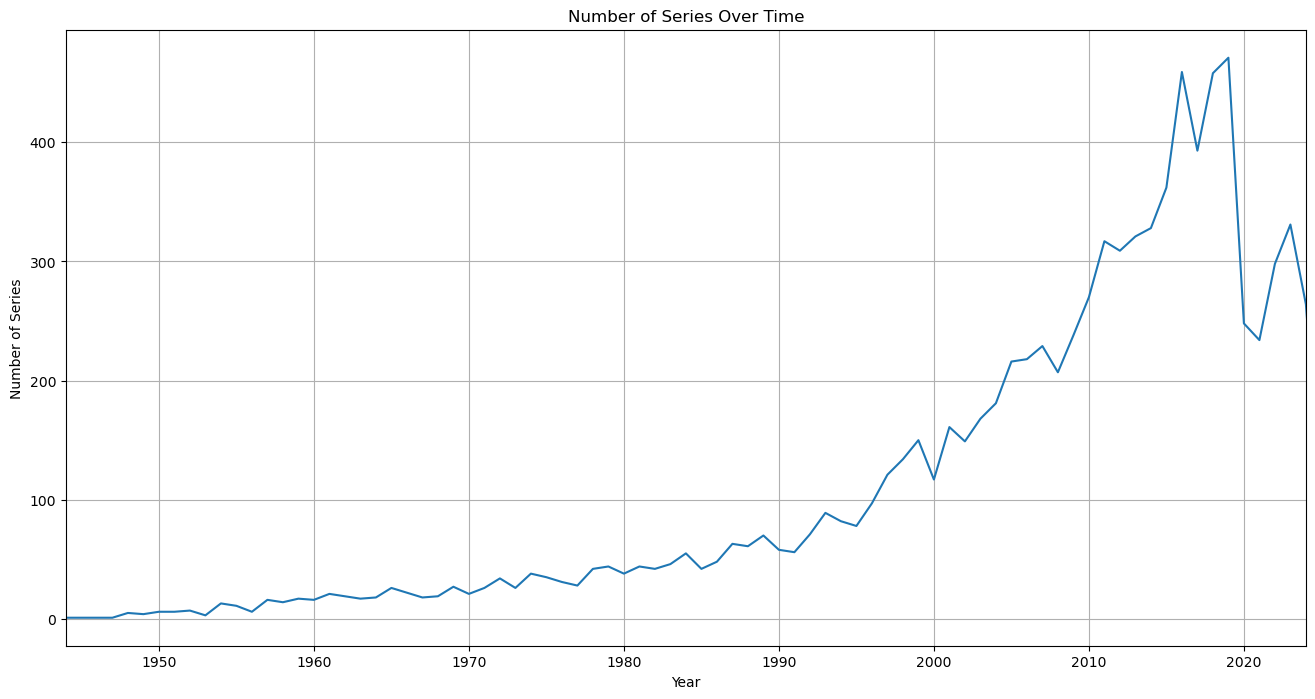

In [375]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=df_anyos, x="First Air Year", y="Series Count")
plt.title("Number of Series Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Series")
plt.grid(True)
plt.xlim([df_anyos["First Air Year"].min(), 2024])

plt.show()

In [366]:
df[df["First Air Year"] ==2024].shape[0]

264

In [367]:
# evolución del rating promedio con el tiempo
rating_anyo = df.groupby("First Air Year")["Rating"].mean().reset_index(name = "Promedio Rating")

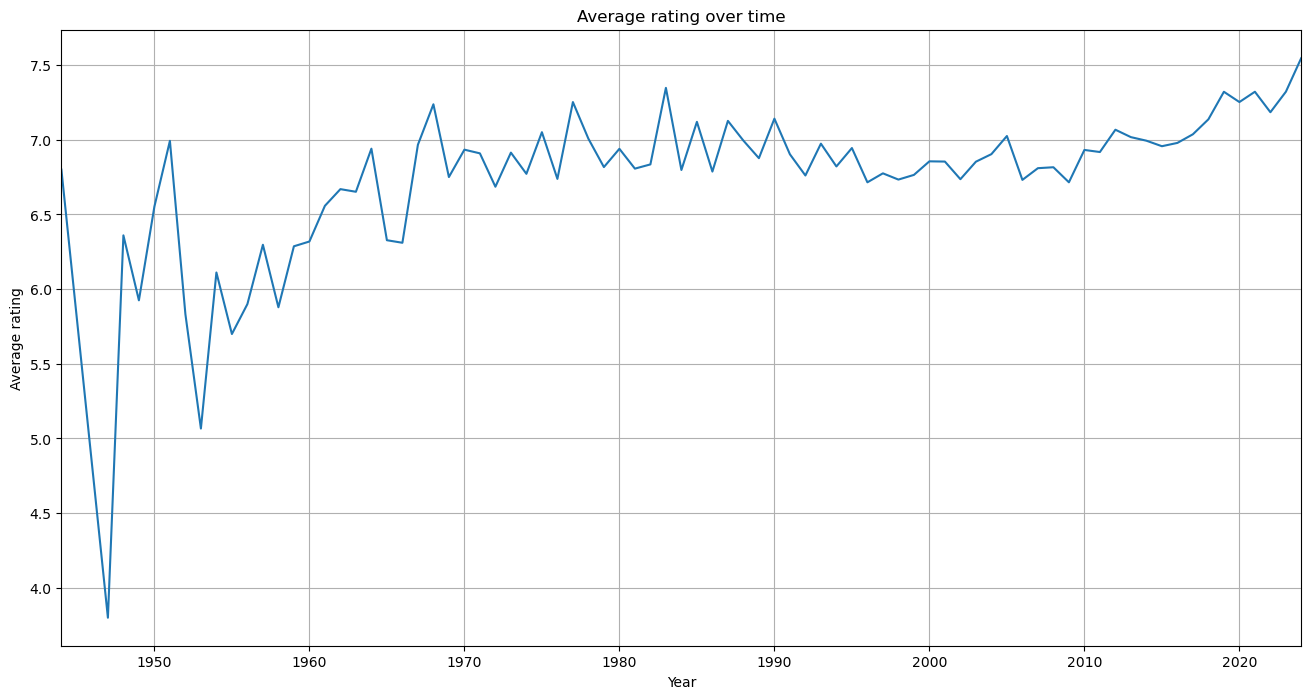

In [376]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=rating_anyo, x="First Air Year", y="Promedio Rating")
plt.title("Average rating over time")
plt.xlabel("Year")
plt.ylabel("Average rating")
plt.grid(True)
plt.xlim([df_anyos["First Air Year"].min(), 2024])

plt.show()

In [377]:
# evolución de los generos a lo largo de los años
# Lista de géneros únicos
generos = df_genero_exploded["Genero"].unique()
generos

array(['Entertainment', 'Drama', 'Family', 'Comedy', 'Action & Adventure',
       'Animation', 'Documentary'], dtype=object)

In [378]:
df_genero["First Air Year"] = df_genero["First Air Date"].dt.year

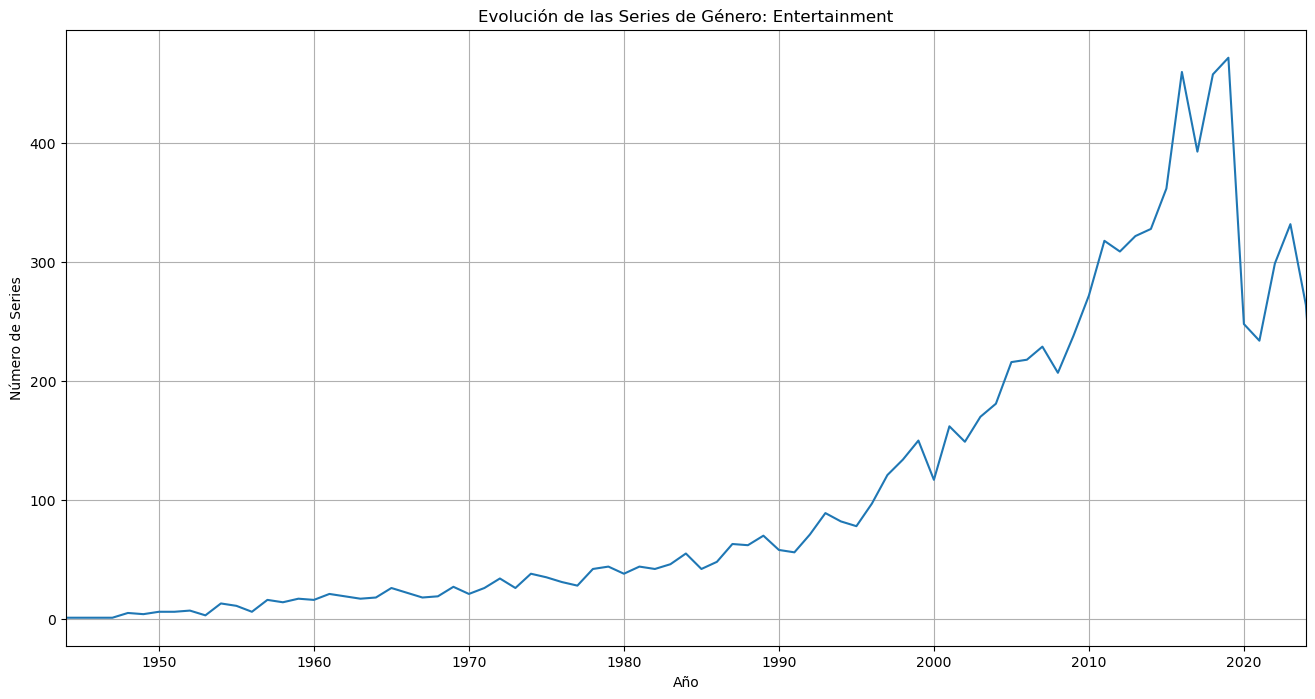

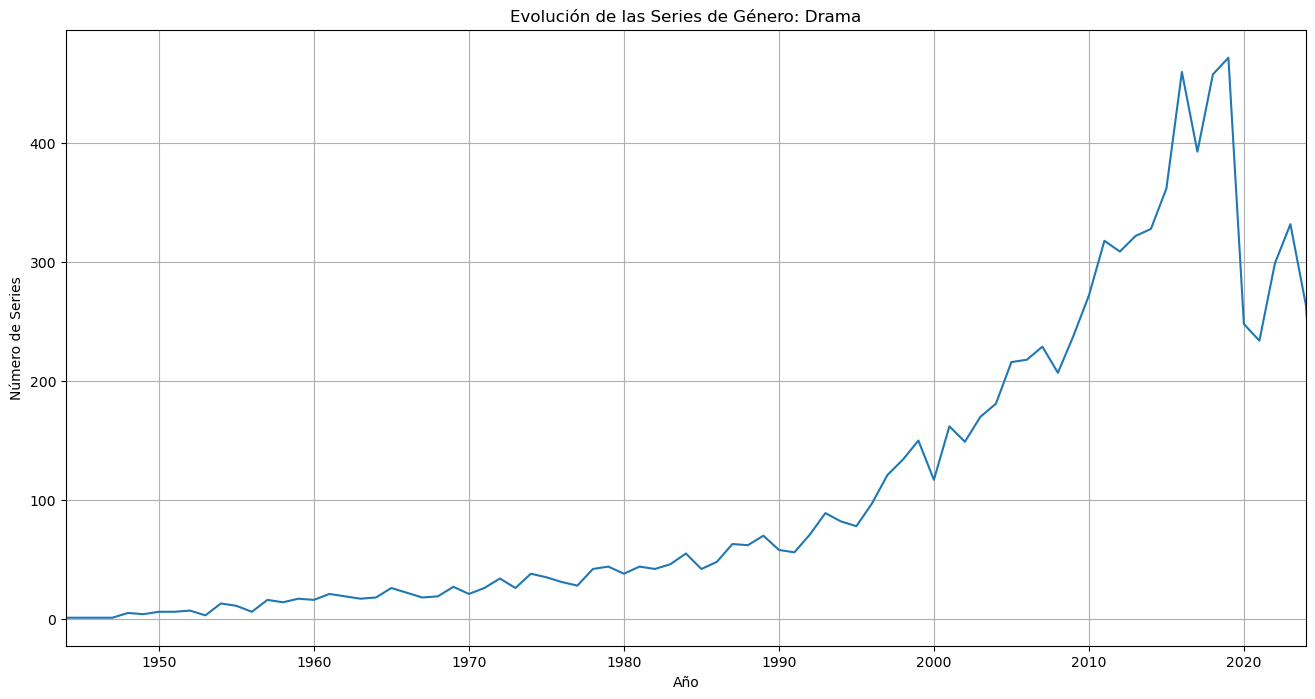

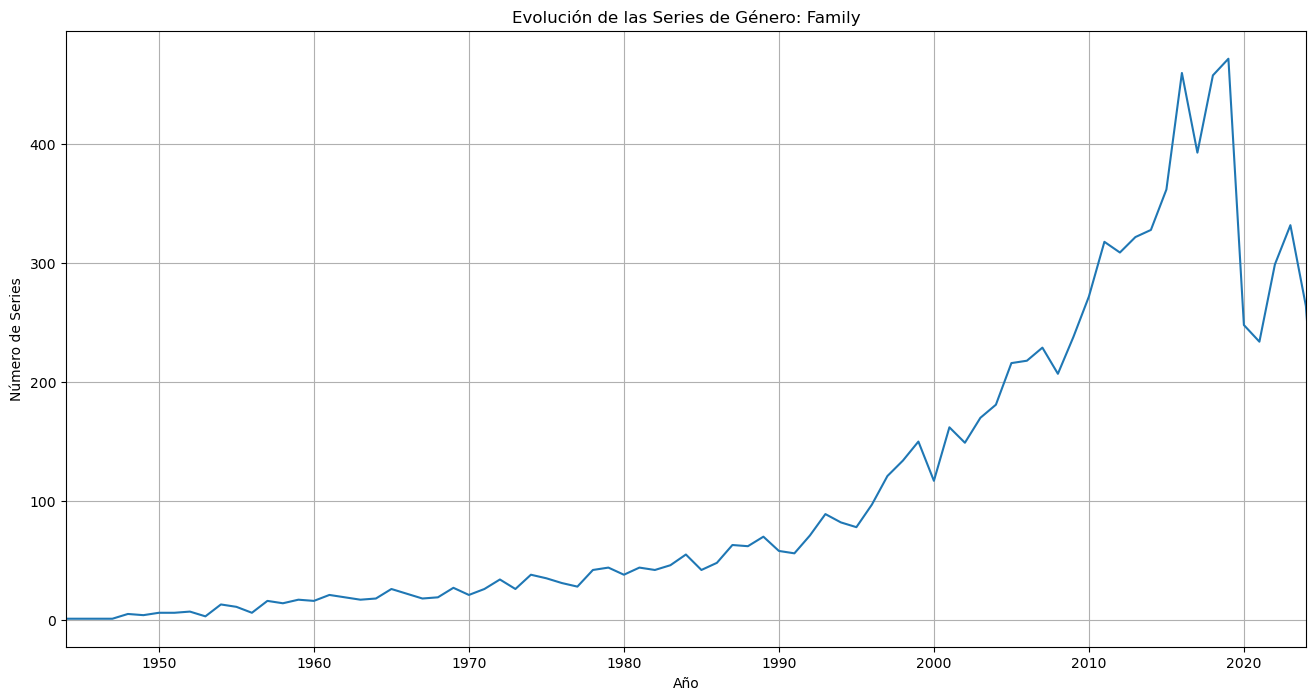

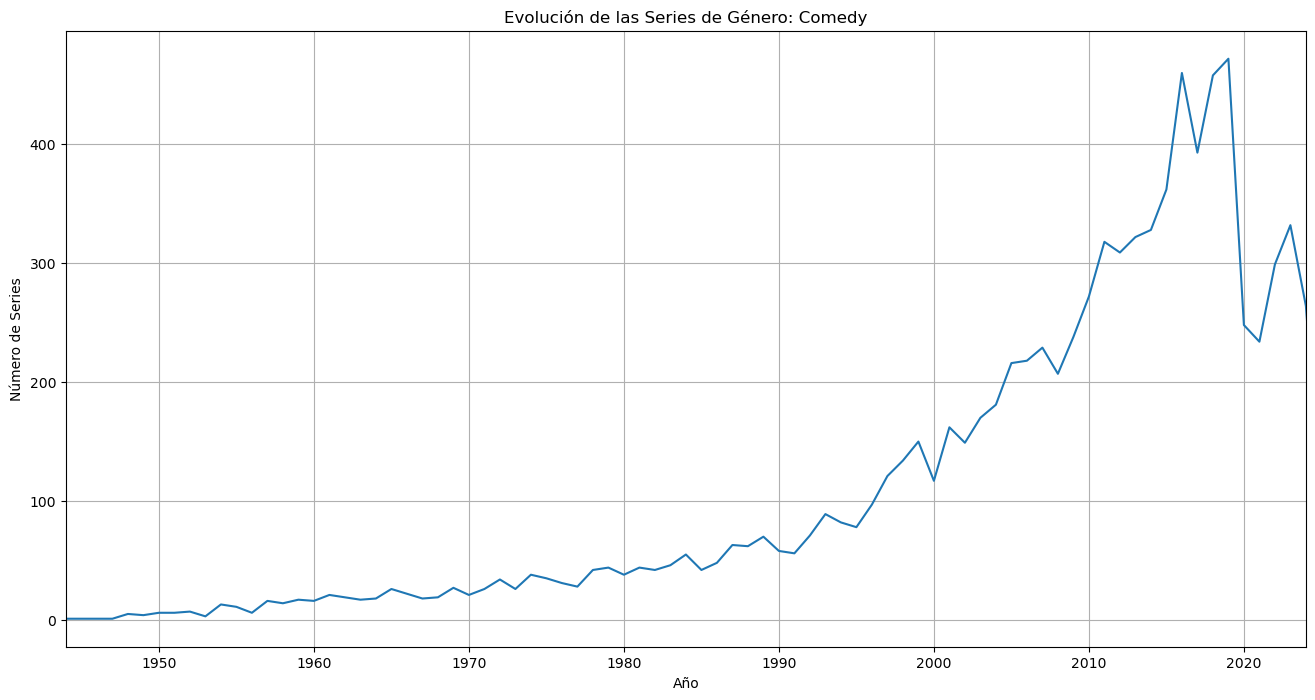

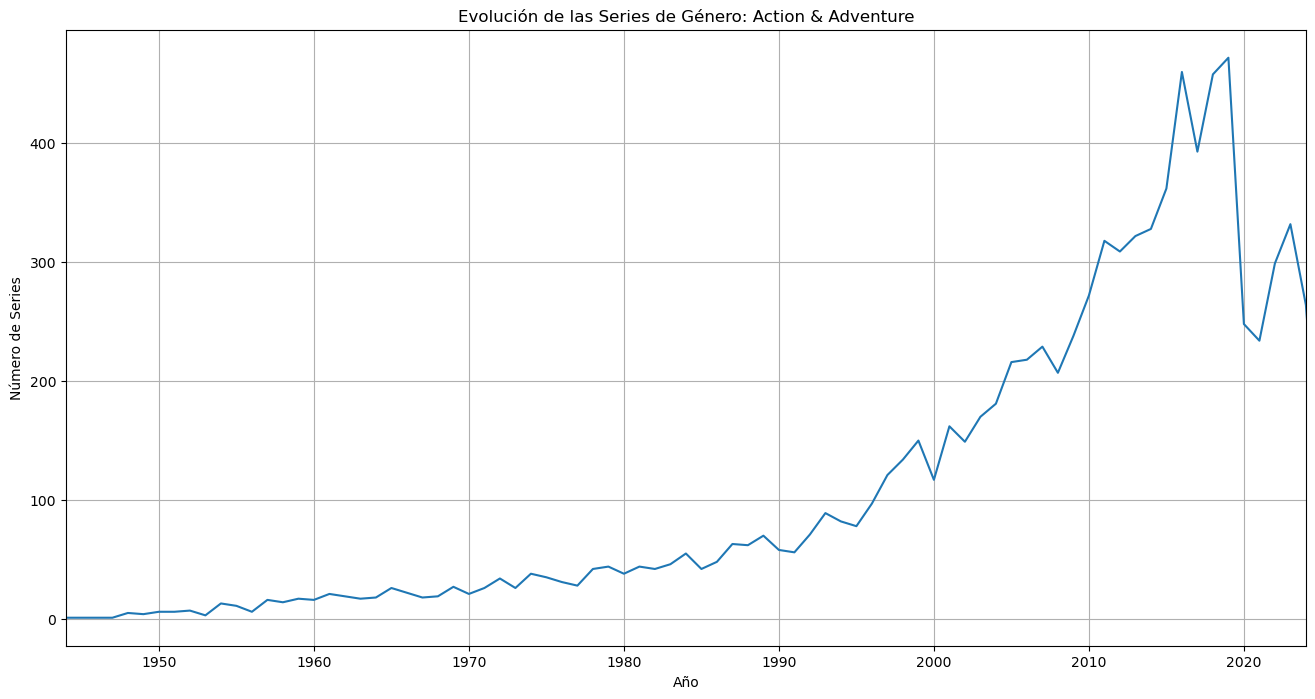

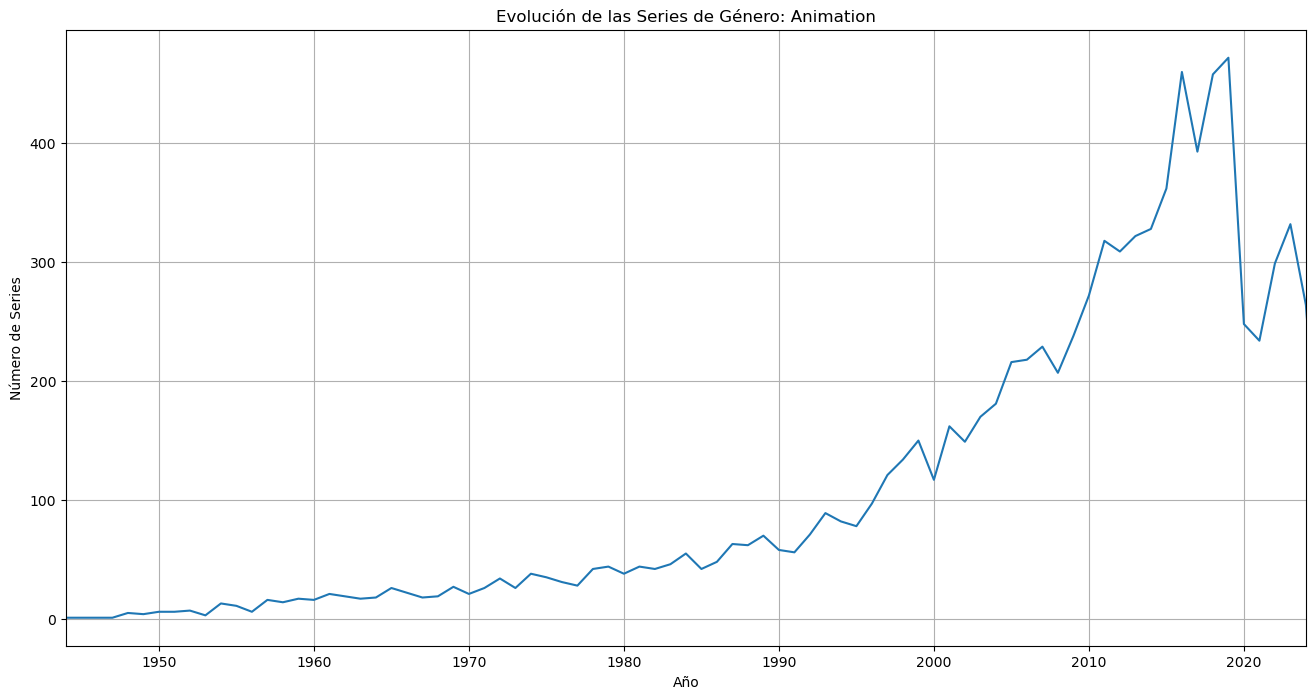

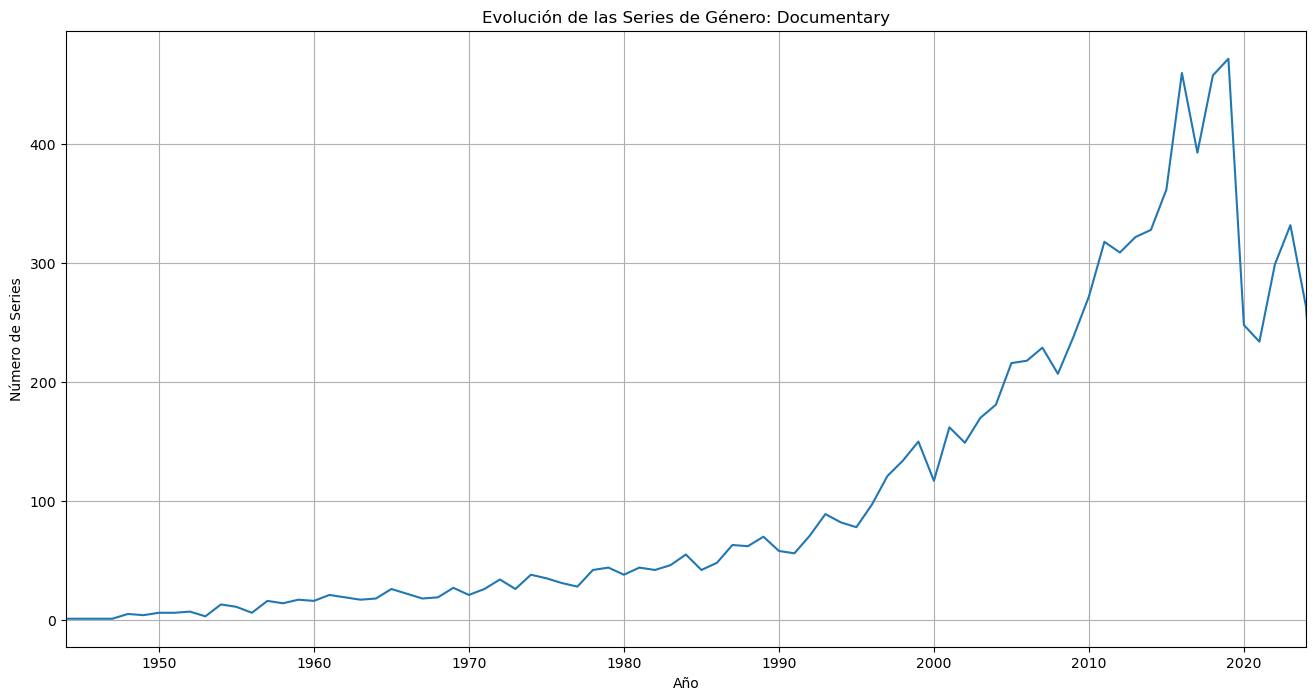

In [380]:
# Bucle para sacar el grafico de cada genero
for genero in generos:
    
    # Contar el número de series por año
    df_anyos = df_genero.groupby("First Air Year").size().reset_index(name="Numero de Series")
    
    plt.figure(figsize=(16, 8))
    sns.lineplot(data=df_anyos, x="First Air Year", y="Numero de Series")
    plt.title(f"Evolución de las Series de Género: {genero}")
    plt.xlabel("Año")
    plt.ylabel("Número de Series")
    plt.grid(True)
    
    # Limitar el gráfico para que no pase de 2024
    plt.xlim([df["First Air Year"].min(), 2024])
    plt.show()

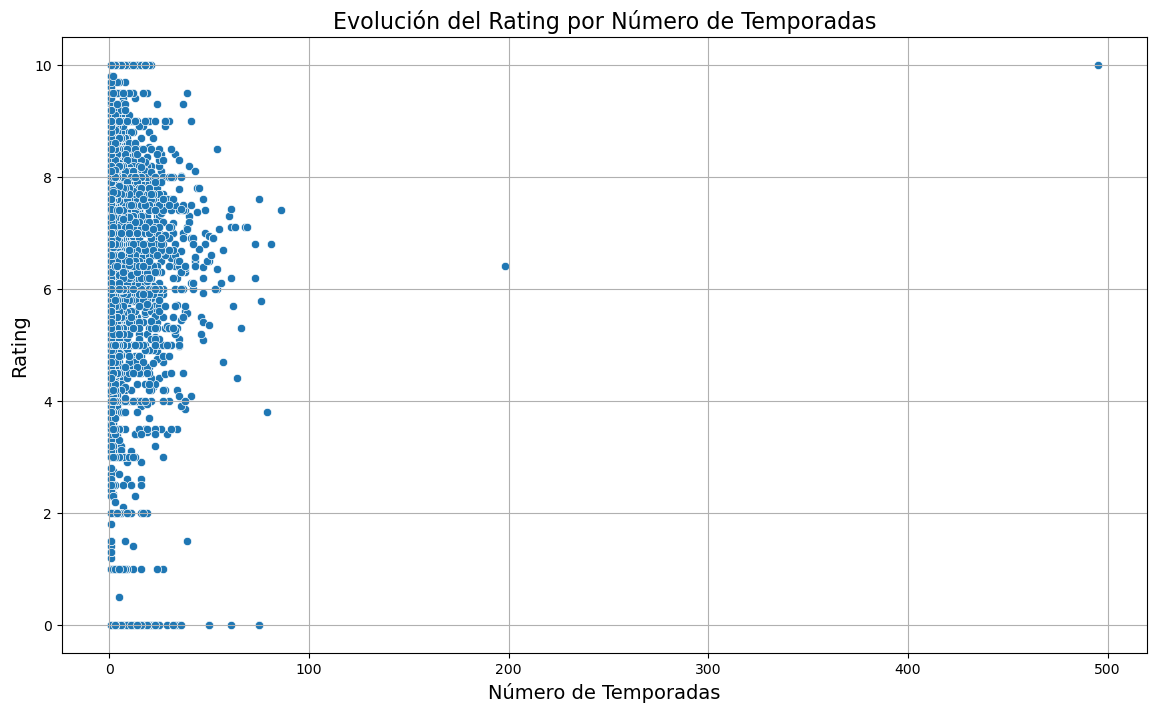

In [217]:
# Filtrar las series que tienen un número de temporadas y un rating disponible
df_temp = df_filtrado.dropna(subset=["Rating_x", "Number of Season"])

# Crear un gráfico de dispersión para ver la relación entre el rating y el número de temporadas
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_temp, x="Number of Season", y="Rating_x")

# Agregar etiquetas y título
plt.title("Evolución del Rating por Número de Temporadas", fontsize=16)
plt.xlabel("Número de Temporadas", fontsize=14)
plt.ylabel("Rating", fontsize=14)
plt.grid(True)
plt.show()